In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

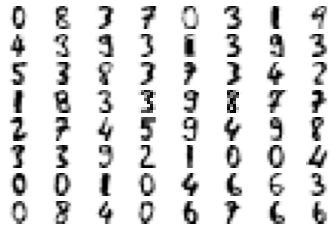

In [2]:
from random import randint

for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(digits.images[randint(0, digits.images.shape[0])], cmap='Greys')
plt.show()

In [3]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
numbers = [*range(10)] # number 2 > number 1
number_of_classification = len(numbers)


list_y = y.tolist()
digits_indexes = []
for digit in numbers:
    li = [i for i in range(len(list_y)) if list_y[i] == digit]
    digits_indexes.extend(li)

samplesize = X[digits_indexes].shape[0]
x_inputs =[tuple(c) for c in X[digits_indexes].tolist()]
x_outputs = [tuple(c) for c in y[digits_indexes].reshape(samplesize,1).tolist()]

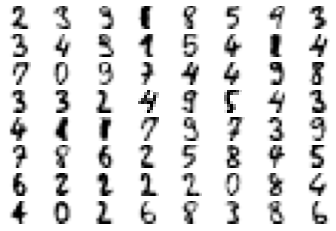

In [6]:
from random import randint
for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(np.array(x_inputs[randint(0, samplesize)]).reshape(8,8), cmap='Greys')
plt.show()

In [7]:
def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        
        outputs = []
        for xi in x_inputs:
            output = net.activate(xi)
            outputs.append(output)
        
        
        px_outputs = softmax(np.array(outputs).reshape(samplesize, number_of_classification), axis=1)
        # the index of maximum in each line
        pred_outputs = np.argmax(px_outputs, axis = 1)
        # replace index to real number, from higher number to lower number!!
        for i in range(number_of_classification):
            index = number_of_classification - i - 1
            pred_outputs[pred_outputs==index] = numbers[index]
        
        real_outputs = np.array(x_outputs).reshape(samplesize,)
        
        acc = np.sum(pred_outputs == real_outputs)/samplesize

        genome.fitness = acc

def run(config_file):
    # Load configuration.
    config = neat.Config(
        neat.DefaultGenome,
        neat.DefaultReproduction,
        neat.DefaultSpeciesSet,
        neat.DefaultStagnation,
        config_file,
    )

    # Create the population, which is the top-level object for a NEAT run.
    p = neat.Population(config)

    # add a stdout reporter to show progress in the terminal
    reporter = neat.StdOutReporter(False)
    p.add_reporter(reporter)
    stats = neat.StatisticsReporter()
    p.add_reporter(stats)
    #checkpointer = neat.Checkpointer(100)
    #p.add_reporter(checkpointer)
    # Run for up to 300 generations.
    winner = p.run(eval_genomes, 3000)

    return [stats, winner]


samplesize = len(x_outputs)

local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist10")
[stats, winner] = run(config_path)

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)
winner_net = neat.nn.FeedForwardNetwork.create(winner, config)


 ****** Running generation 0 ****** 

Population's average fitness: 0.10179 stdev: 0.03840
Best fitness: 0.22573 - size: (10, 64) - species 8 - id 140
Average adjusted fitness: 0.097
Mean genetic distance 2.828, standard deviation 0.301
Population of 199 members in 44 species
Total extinctions: 0
Generation time: 54.220 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.11693 stdev: 0.04048
Best fitness: 0.24366 - size: (10, 63) - species 4 - id 324
Average adjusted fitness: 0.099
Mean genetic distance 2.917, standard deviation 0.322
Population of 201 members in 45 species
Total extinctions: 0
Generation time: 54.824 sec (54.522 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.12268 stdev: 0.03871
Best fitness: 0.24366 - size: (10, 63) - species 4 - id 324
Average adjusted fitness: 0.080
Mean genetic distance 2.946, standard deviation 0.335
Population of 207 members in 45 species
Total extinctions: 0
Generation time: 57.440 sec (5

Population's average fitness: 0.17191 stdev: 0.05425
Best fitness: 0.32962 - size: (11, 62) - species 44 - id 2143
Average adjusted fitness: 0.112
Mean genetic distance 3.151, standard deviation 0.413
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 62.390 sec (63.947 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.16916 stdev: 0.05797
Best fitness: 0.32962 - size: (11, 62) - species 44 - id 2143
Average adjusted fitness: 0.153
Mean genetic distance 3.151, standard deviation 0.411
Population of 193 members in 30 species
Total extinctions: 0
Generation time: 65.340 sec (63.761 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.16654 stdev: 0.06050
Best fitness: 0.32962 - size: (11, 62) - species 44 - id 2143
Average adjusted fitness: 0.144
Mean genetic distance 3.150, standard deviation 0.417
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 62.521 sec (63.758 average)

Population's average fitness: 0.18133 stdev: 0.06116
Best fitness: 0.34261 - size: (18, 78) - species 35 - id 6386
Average adjusted fitness: 0.124
Mean genetic distance 3.226, standard deviation 0.520
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 69.516 sec (67.824 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.17877 stdev: 0.06078
Best fitness: 0.34261 - size: (18, 78) - species 35 - id 6386
Average adjusted fitness: 0.129
Mean genetic distance 3.201, standard deviation 0.507
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 67.000 sec (67.457 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.17762 stdev: 0.05766
Best fitness: 0.34261 - size: (18, 78) - species 35 - id 6386
Average adjusted fitness: 0.130
Mean genetic distance 3.209, standard deviation 0.527
Population of 205 members in 16 species
Total extinctions: 0
Generation time: 69.557 sec (67.891 average)

Population's average fitness: 0.18590 stdev: 0.06095
Best fitness: 0.34323 - size: (19, 81) - species 35 - id 7389
Average adjusted fitness: 0.121
Mean genetic distance 3.110, standard deviation 0.582
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 71.462 sec (71.252 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.18404 stdev: 0.06334
Best fitness: 0.34323 - size: (19, 81) - species 35 - id 7389
Average adjusted fitness: 0.131
Mean genetic distance 3.084, standard deviation 0.612
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 70.630 sec (71.133 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.18983 stdev: 0.06280
Best fitness: 0.34323 - size: (19, 81) - species 35 - id 7389
Average adjusted fitness: 0.138
Mean genetic distance 3.096, standard deviation 0.590
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 71.774 sec (71.034 average)



Population's average fitness: 0.19569 stdev: 0.06500
Best fitness: 0.35683 - size: (21, 82) - species 35 - id 13894
Average adjusted fitness: 0.160
Mean genetic distance 3.187, standard deviation 0.607
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 78.849 sec (77.103 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.19206 stdev: 0.06395
Best fitness: 0.35683 - size: (21, 82) - species 35 - id 13894
Average adjusted fitness: 0.114
Mean genetic distance 3.208, standard deviation 0.618
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 79.159 sec (77.384 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.19030 stdev: 0.06394
Best fitness: 0.35683 - size: (21, 82) - species 35 - id 13894
Average adjusted fitness: 0.119
Mean genetic distance 3.199, standard deviation 0.637
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 79.402 sec (77.814 avera

Population's average fitness: 0.19556 stdev: 0.06636
Best fitness: 0.37662 - size: (22, 82) - species 64 - id 19323
Average adjusted fitness: 0.136
Mean genetic distance 3.279, standard deviation 0.646
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 84.011 sec (81.864 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.19926 stdev: 0.06914
Best fitness: 0.37662 - size: (22, 82) - species 64 - id 19323
Average adjusted fitness: 0.189
Mean genetic distance 3.253, standard deviation 0.679
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 80.738 sec (81.720 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.19493 stdev: 0.06084
Best fitness: 0.37662 - size: (22, 82) - species 64 - id 19323
Average adjusted fitness: 0.117
Mean genetic distance 3.284, standard deviation 0.666
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 82.604 sec (81.657 ave

Population's average fitness: 0.18274 stdev: 0.07352
Best fitness: 0.39765 - size: (24, 84) - species 71 - id 23675
Average adjusted fitness: 0.160
Mean genetic distance 2.748, standard deviation 0.536
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 83.593 sec (82.887 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.18651 stdev: 0.07789
Best fitness: 0.39765 - size: (24, 84) - species 71 - id 23675
Average adjusted fitness: 0.145
Mean genetic distance 2.636, standard deviation 0.393
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 86.219 sec (83.296 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.18961 stdev: 0.06957
Best fitness: 0.39765 - size: (24, 84) - species 71 - id 23675
Average adjusted fitness: 0.165
Mean genetic distance 2.644, standard deviation 0.407
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 84.505 sec (83.031 ave

Population's average fitness: 0.19808 stdev: 0.07531
Best fitness: 0.39765 - size: (24, 84) - species 71 - id 23675
Average adjusted fitness: 0.187
Mean genetic distance 2.668, standard deviation 0.438
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 83.669 sec (81.551 average)

 ****** Running generation 169 ****** 

Population's average fitness: 0.18918 stdev: 0.07304
Best fitness: 0.39765 - size: (24, 84) - species 71 - id 23675
Average adjusted fitness: 0.148
Mean genetic distance 2.648, standard deviation 0.442
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 85.627 sec (81.985 average)

 ****** Running generation 170 ****** 

Population's average fitness: 0.18670 stdev: 0.07418
Best fitness: 0.39765 - size: (24, 84) - species 71 - id 23675
Average adjusted fitness: 0.168
Mean genetic distance 2.665, standard deviation 0.441
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 82.585 sec (82.270 avera

Population's average fitness: 0.18872 stdev: 0.07214
Best fitness: 0.39765 - size: (24, 84) - species 71 - id 23675
Average adjusted fitness: 0.144
Mean genetic distance 2.736, standard deviation 0.463
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 87.896 sec (84.767 average)

 ****** Running generation 193 ****** 

Population's average fitness: 0.19422 stdev: 0.07191
Best fitness: 0.39765 - size: (24, 84) - species 71 - id 23675
Average adjusted fitness: 0.137
Mean genetic distance 2.727, standard deviation 0.479
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 84.126 sec (84.585 average)

 ****** Running generation 194 ****** 

Population's average fitness: 0.19739 stdev: 0.07327
Best fitness: 0.39765 - size: (24, 84) - species 71 - id 23675
Average adjusted fitness: 0.160
Mean genetic distance 2.733, standard deviation 0.454
Population of 197 members in 8 species
Total extinctions: 0
Generation time: 86.771 sec (84.846 averag

Population's average fitness: 0.19375 stdev: 0.06819
Best fitness: 0.39765 - size: (24, 84) - species 71 - id 23675
Average adjusted fitness: 0.148
Mean genetic distance 2.595, standard deviation 0.475
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 82.981 sec (85.500 average)

 ****** Running generation 217 ****** 

Population's average fitness: 0.19511 stdev: 0.06917
Best fitness: 0.39765 - size: (24, 84) - species 71 - id 23675
Average adjusted fitness: 0.156
Mean genetic distance 2.579, standard deviation 0.456
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 80.256 sec (85.308 average)

 ****** Running generation 218 ****** 

Population's average fitness: 0.19350 stdev: 0.07122
Best fitness: 0.39765 - size: (24, 84) - species 71 - id 23675
Average adjusted fitness: 0.144
Mean genetic distance 2.550, standard deviation 0.444
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 81.306 sec (84.840 averag

Population's average fitness: 0.20274 stdev: 0.07599
Best fitness: 0.40383 - size: (25, 82) - species 94 - id 39824
Average adjusted fitness: 0.142
Mean genetic distance 2.759, standard deviation 0.427
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 83.158 sec (81.900 average)

 ****** Running generation 241 ****** 

Population's average fitness: 0.20490 stdev: 0.07597
Best fitness: 0.40383 - size: (25, 82) - species 94 - id 39824
Average adjusted fitness: 0.158
Mean genetic distance 2.775, standard deviation 0.424
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 83.056 sec (82.126 average)

 ****** Running generation 242 ****** 

Population's average fitness: 0.19693 stdev: 0.07542
Best fitness: 0.40383 - size: (25, 82) - species 94 - id 39824
Average adjusted fitness: 0.116
Mean genetic distance 2.760, standard deviation 0.440
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 85.755 sec (82.949 ave

Population's average fitness: 0.18725 stdev: 0.07885
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.157
Mean genetic distance 2.808, standard deviation 0.458
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 93.592 sec (86.765 average)

 ****** Running generation 265 ****** 

Population's average fitness: 0.19324 stdev: 0.07745
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.149
Mean genetic distance 2.808, standard deviation 0.471
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 87.973 sec (86.765 average)

 ****** Running generation 266 ****** 

Population's average fitness: 0.18853 stdev: 0.07585
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.145
Mean genetic distance 2.823, standard deviation 0.472
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 86.424 sec (86.672 ave

Population's average fitness: 0.21225 stdev: 0.07721
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.194
Mean genetic distance 2.861, standard deviation 0.447
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 76.415 sec (75.452 average)

 ****** Running generation 289 ****** 

Population's average fitness: 0.21211 stdev: 0.07422
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.154
Mean genetic distance 2.850, standard deviation 0.452
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 75.402 sec (75.410 average)

 ****** Running generation 290 ****** 

Population's average fitness: 0.21493 stdev: 0.07676
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.130
Mean genetic distance 2.853, standard deviation 0.465
Population of 196 members in 15 species
Total extinctions: 0
Generation time: 76.604 sec (75.679 ave

Population's average fitness: 0.19524 stdev: 0.07460
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.170
Mean genetic distance 2.710, standard deviation 0.514
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 56.425 sec (70.053 average)

 ****** Running generation 313 ****** 

Population's average fitness: 0.20403 stdev: 0.07334
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.136
Mean genetic distance 2.745, standard deviation 0.467
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 55.061 sec (68.257 average)

 ****** Running generation 314 ****** 

Population's average fitness: 0.19917 stdev: 0.07416
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.150
Mean genetic distance 2.760, standard deviation 0.461
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 53.391 sec (66.072 averag

Population's average fitness: 0.20139 stdev: 0.07341
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.165
Mean genetic distance 2.769, standard deviation 0.445
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 51.858 sec (52.031 average)

 ****** Running generation 337 ****** 

Population's average fitness: 0.19654 stdev: 0.07770
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.174
Mean genetic distance 2.743, standard deviation 0.452
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 52.214 sec (52.151 average)

 ****** Running generation 338 ****** 

Population's average fitness: 0.20354 stdev: 0.07822
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.136
Mean genetic distance 2.721, standard deviation 0.473
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 53.266 sec (52.419 aver

Population's average fitness: 0.19817 stdev: 0.07522
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.185
Mean genetic distance 2.700, standard deviation 0.476
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 56.551 sec (55.762 average)

 ****** Running generation 361 ****** 

Population's average fitness: 0.19671 stdev: 0.07663
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.186
Mean genetic distance 2.698, standard deviation 0.493
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 55.608 sec (55.762 average)

 ****** Running generation 362 ****** 

Population's average fitness: 0.20022 stdev: 0.07432
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.192
Mean genetic distance 2.732, standard deviation 0.456
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 57.415 sec (55.931 averag

Population's average fitness: 0.20194 stdev: 0.07503
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.171
Mean genetic distance 2.609, standard deviation 0.407
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 62.913 sec (59.115 average)

 ****** Running generation 385 ****** 

Population's average fitness: 0.19791 stdev: 0.07837
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.172
Mean genetic distance 2.605, standard deviation 0.398
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 62.360 sec (59.533 average)

 ****** Running generation 386 ****** 

Population's average fitness: 0.20049 stdev: 0.07859
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.163
Mean genetic distance 2.620, standard deviation 0.396
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 63.407 sec (60.161 averag

Population's average fitness: 0.19440 stdev: 0.07447
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.146
Mean genetic distance 2.558, standard deviation 0.384
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 45.384 sec (49.745 average)

 ****** Running generation 409 ****** 

Population's average fitness: 0.19669 stdev: 0.07278
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.137
Mean genetic distance 2.572, standard deviation 0.374
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 48.323 sec (49.103 average)

 ****** Running generation 410 ****** 

Population's average fitness: 0.19528 stdev: 0.07575
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.146
Mean genetic distance 2.584, standard deviation 0.375
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 49.670 sec (49.138 averag

Population's average fitness: 0.19857 stdev: 0.07557
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.165
Mean genetic distance 2.665, standard deviation 0.421
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 50.503 sec (52.072 average)

 ****** Running generation 433 ****** 

Population's average fitness: 0.19712 stdev: 0.07660
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.185
Mean genetic distance 2.644, standard deviation 0.420
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 51.496 sec (52.039 average)

 ****** Running generation 434 ****** 

Population's average fitness: 0.20382 stdev: 0.07934
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.175
Mean genetic distance 2.612, standard deviation 0.421
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 48.868 sec (51.937 ave

Population's average fitness: 0.18750 stdev: 0.07055
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.139
Mean genetic distance 2.642, standard deviation 0.457
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 47.093 sec (50.261 average)

 ****** Running generation 457 ****** 

Population's average fitness: 0.17695 stdev: 0.07423
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.146
Mean genetic distance 2.681, standard deviation 0.442
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 49.307 sec (49.765 average)

 ****** Running generation 458 ****** 

Population's average fitness: 0.18148 stdev: 0.07717
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.172
Mean genetic distance 2.718, standard deviation 0.423
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 46.169 sec (49.384 averag

Population's average fitness: 0.20301 stdev: 0.07604
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.140
Mean genetic distance 2.767, standard deviation 0.516
Population of 197 members in 9 species
Total extinctions: 0
Generation time: 43.255 sec (40.637 average)

 ****** Running generation 481 ****** 

Population's average fitness: 0.20195 stdev: 0.07670
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.162
Mean genetic distance 2.772, standard deviation 0.525
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 37.275 sec (40.257 average)

 ****** Running generation 482 ****** 

Population's average fitness: 0.19619 stdev: 0.07710
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.154
Mean genetic distance 2.722, standard deviation 0.558
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 38.894 sec (40.181 averag

Population's average fitness: 0.20112 stdev: 0.07927
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.166
Mean genetic distance 2.715, standard deviation 0.471
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 52.930 sec (44.048 average)

 ****** Running generation 505 ****** 

Population's average fitness: 0.19797 stdev: 0.08566
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.184
Mean genetic distance 2.733, standard deviation 0.476
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 51.088 sec (45.102 average)

 ****** Running generation 506 ****** 

Population's average fitness: 0.20710 stdev: 0.08224
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.155
Mean genetic distance 2.729, standard deviation 0.496
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 48.432 sec (46.010 aver

Population's average fitness: 0.20808 stdev: 0.07867
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.145
Mean genetic distance 2.706, standard deviation 0.462
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 43.300 sec (45.940 average)

 ****** Running generation 529 ****** 

Population's average fitness: 0.20622 stdev: 0.07792
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.175
Mean genetic distance 2.680, standard deviation 0.474
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 49.524 sec (46.318 average)

 ****** Running generation 530 ****** 

Population's average fitness: 0.19943 stdev: 0.07968
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.164
Mean genetic distance 2.664, standard deviation 0.499
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 43.812 sec (45.908 aver

Population's average fitness: 0.20087 stdev: 0.07580
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.178
Mean genetic distance 2.655, standard deviation 0.541
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 46.003 sec (45.433 average)

 ****** Running generation 553 ****** 

Population's average fitness: 0.20684 stdev: 0.07817
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.165
Mean genetic distance 2.620, standard deviation 0.550
Population of 201 members in 5 species
Total extinctions: 0
Generation time: 44.501 sec (45.467 average)

 ****** Running generation 554 ****** 

Population's average fitness: 0.20521 stdev: 0.07509
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.170
Mean genetic distance 2.643, standard deviation 0.526
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 46.204 sec (45.688 averag

Population's average fitness: 0.18975 stdev: 0.07753
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.149
Mean genetic distance 2.771, standard deviation 0.447
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 45.664 sec (45.977 average)

 ****** Running generation 577 ****** 

Population's average fitness: 0.19073 stdev: 0.07833
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.173
Mean genetic distance 2.782, standard deviation 0.438
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 43.920 sec (45.745 average)

 ****** Running generation 578 ****** 

Population's average fitness: 0.19132 stdev: 0.07932
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.149
Mean genetic distance 2.790, standard deviation 0.450
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 44.105 sec (45.319 ave

Population's average fitness: 0.19938 stdev: 0.08235
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.147
Mean genetic distance 2.757, standard deviation 0.488
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 46.682 sec (46.224 average)

 ****** Running generation 601 ****** 

Population's average fitness: 0.20127 stdev: 0.07693
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.179
Mean genetic distance 2.782, standard deviation 0.478
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 47.538 sec (46.462 average)

 ****** Running generation 602 ****** 

Population's average fitness: 0.19846 stdev: 0.07989
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.181
Mean genetic distance 2.791, standard deviation 0.447
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 49.155 sec (46.852 aver

Population's average fitness: 0.20051 stdev: 0.07906
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.168
Mean genetic distance 2.662, standard deviation 0.519
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 47.803 sec (46.856 average)

 ****** Running generation 625 ****** 

Population's average fitness: 0.20558 stdev: 0.07705
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.166
Mean genetic distance 2.637, standard deviation 0.516
Population of 202 members in 7 species
Total extinctions: 0
Generation time: 47.077 sec (46.766 average)

 ****** Running generation 626 ****** 

Population's average fitness: 0.19229 stdev: 0.07993
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.171
Mean genetic distance 2.650, standard deviation 0.506
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 48.825 sec (46.999 averag

Population's average fitness: 0.20264 stdev: 0.07621
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.152
Mean genetic distance 2.570, standard deviation 0.400
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 54.053 sec (53.007 average)

 ****** Running generation 649 ****** 

Population's average fitness: 0.20887 stdev: 0.08251
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.191
Mean genetic distance 2.572, standard deviation 0.390
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 54.374 sec (53.023 average)

 ****** Running generation 650 ****** 

Population's average fitness: 0.19667 stdev: 0.08442
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.146
Mean genetic distance 2.587, standard deviation 0.356
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 53.193 sec (53.121 ave

Population's average fitness: 0.19001 stdev: 0.07971
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.175
Mean genetic distance 2.582, standard deviation 0.479
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 48.163 sec (51.482 average)

 ****** Running generation 673 ****** 

Population's average fitness: 0.20142 stdev: 0.08099
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.143
Mean genetic distance 2.629, standard deviation 0.516
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 48.008 sec (51.080 average)

 ****** Running generation 674 ****** 

Population's average fitness: 0.19183 stdev: 0.08413
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.181
Mean genetic distance 2.652, standard deviation 0.516
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 41.809 sec (49.965 averag

Population's average fitness: 0.18225 stdev: 0.07502
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.152
Mean genetic distance 2.705, standard deviation 0.520
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 46.372 sec (45.224 average)

 ****** Running generation 697 ****** 

Population's average fitness: 0.18670 stdev: 0.07578
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.135
Mean genetic distance 2.794, standard deviation 0.511
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 46.338 sec (45.379 average)

 ****** Running generation 698 ****** 

Population's average fitness: 0.19290 stdev: 0.07935
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.147
Mean genetic distance 2.831, standard deviation 0.497
Population of 197 members in 10 species
Total extinctions: 0
Generation time: 44.743 sec (45.319 avera

Population's average fitness: 0.20894 stdev: 0.08114
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.197
Mean genetic distance 2.783, standard deviation 0.480
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 49.088 sec (49.449 average)

 ****** Running generation 721 ****** 

Population's average fitness: 0.21011 stdev: 0.08050
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.187
Mean genetic distance 2.748, standard deviation 0.509
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 50.064 sec (49.366 average)

 ****** Running generation 722 ****** 

Population's average fitness: 0.21405 stdev: 0.08095
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.178
Mean genetic distance 2.754, standard deviation 0.519
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 46.896 sec (49.214 aver

Population's average fitness: 0.19675 stdev: 0.07802
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.172
Mean genetic distance 2.732, standard deviation 0.567
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 45.978 sec (46.173 average)

 ****** Running generation 745 ****** 

Population's average fitness: 0.19987 stdev: 0.07627
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.167
Mean genetic distance 2.733, standard deviation 0.550
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 45.386 sec (45.663 average)

 ****** Running generation 746 ****** 

Population's average fitness: 0.19675 stdev: 0.07568
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.152
Mean genetic distance 2.724, standard deviation 0.563
Population of 198 members in 5 species
Total extinctions: 0
Generation time: 46.844 sec (45.726 averag

Population's average fitness: 0.21558 stdev: 0.08107
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.179
Mean genetic distance 2.745, standard deviation 0.515
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 45.521 sec (47.479 average)

 ****** Running generation 769 ****** 

Population's average fitness: 0.20745 stdev: 0.08191
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.173
Mean genetic distance 2.740, standard deviation 0.515
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 46.808 sec (46.845 average)

 ****** Running generation 770 ****** 

Population's average fitness: 0.21152 stdev: 0.07820
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.179
Mean genetic distance 2.745, standard deviation 0.521
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 45.446 sec (46.690 ave

Population's average fitness: 0.20167 stdev: 0.08200
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.133
Mean genetic distance 2.789, standard deviation 0.487
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 44.182 sec (45.336 average)

 ****** Running generation 793 ****** 

Population's average fitness: 0.20498 stdev: 0.08099
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.194
Mean genetic distance 2.791, standard deviation 0.501
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 43.023 sec (45.030 average)

 ****** Running generation 794 ****** 

Population's average fitness: 0.20328 stdev: 0.08122
Best fitness: 0.44094 - size: (24, 86) - species 71 - id 42195
Average adjusted fitness: 0.141
Mean genetic distance 2.793, standard deviation 0.505
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 43.805 sec (44.369 ave

Population's average fitness: 0.19304 stdev: 0.07635
Best fitness: 0.44712 - size: (30, 90) - species 113 - id 144929
Average adjusted fitness: 0.134
Mean genetic distance 2.780, standard deviation 0.497
Population of 198 members in 7 species
Total extinctions: 0
Generation time: 43.465 sec (45.364 average)

 ****** Running generation 817 ****** 

Population's average fitness: 0.19504 stdev: 0.07695
Best fitness: 0.44712 - size: (30, 90) - species 113 - id 144929
Average adjusted fitness: 0.170
Mean genetic distance 2.762, standard deviation 0.500
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 43.706 sec (44.978 average)

 ****** Running generation 818 ****** 

Population's average fitness: 0.19322 stdev: 0.08124
Best fitness: 0.44712 - size: (30, 90) - species 113 - id 144929
Average adjusted fitness: 0.179
Mean genetic distance 2.747, standard deviation 0.534
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 42.114 sec (44.582 

Mean genetic distance 2.712, standard deviation 0.540
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 46.331 sec (43.452 average)

 ****** Running generation 840 ****** 

Population's average fitness: 0.20640 stdev: 0.08203
Best fitness: 0.44712 - size: (30, 90) - species 113 - id 144929
Average adjusted fitness: 0.144
Mean genetic distance 2.687, standard deviation 0.570
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 42.090 sec (43.485 average)

 ****** Running generation 841 ****** 

Population's average fitness: 0.19776 stdev: 0.08037
Best fitness: 0.44712 - size: (30, 90) - species 113 - id 144929
Average adjusted fitness: 0.177
Mean genetic distance 2.700, standard deviation 0.554
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 42.270 sec (43.358 average)

 ****** Running generation 842 ****** 

Population's average fitness: 0.19826 stdev: 0.07481
Best fitness: 0.44712 - size: (30, 90) - specie

Population's average fitness: 0.18719 stdev: 0.08046
Best fitness: 0.44712 - size: (30, 90) - species 113 - id 144929
Average adjusted fitness: 0.163
Mean genetic distance 2.869, standard deviation 0.549
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 48.507 sec (47.843 average)

 ****** Running generation 864 ****** 

Population's average fitness: 0.20036 stdev: 0.08688
Best fitness: 0.44712 - size: (30, 90) - species 113 - id 144929
Average adjusted fitness: 0.181
Mean genetic distance 2.867, standard deviation 0.545
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 54.775 sec (48.683 average)

 ****** Running generation 865 ****** 

Population's average fitness: 0.19314 stdev: 0.08284
Best fitness: 0.44712 - size: (30, 90) - species 113 - id 144929
Average adjusted fitness: 0.173
Mean genetic distance 2.886, standard deviation 0.529
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 53.469 sec (49.4

Mean genetic distance 2.763, standard deviation 0.464
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 51.510 sec (49.641 average)

 ****** Running generation 887 ****** 

Population's average fitness: 0.19889 stdev: 0.07524
Best fitness: 0.44712 - size: (30, 90) - species 113 - id 144929
Average adjusted fitness: 0.158
Mean genetic distance 2.770, standard deviation 0.466
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 49.749 sec (49.732 average)

 ****** Running generation 888 ****** 

Population's average fitness: 0.20248 stdev: 0.07924
Best fitness: 0.44712 - size: (30, 90) - species 113 - id 144929
Average adjusted fitness: 0.156
Mean genetic distance 2.783, standard deviation 0.475
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 54.955 sec (50.301 average)

 ****** Running generation 889 ****** 

Population's average fitness: 0.20014 stdev: 0.07552
Best fitness: 0.44712 - size: (30, 90) - spe

Population's average fitness: 0.21819 stdev: 0.08206
Best fitness: 0.44712 - size: (30, 90) - species 113 - id 144929
Average adjusted fitness: 0.173
Mean genetic distance 2.785, standard deviation 0.470
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 49.912 sec (50.987 average)

 ****** Running generation 911 ****** 

Population's average fitness: 0.22066 stdev: 0.08099
Best fitness: 0.44712 - size: (30, 90) - species 113 - id 144929
Average adjusted fitness: 0.151
Mean genetic distance 2.783, standard deviation 0.479
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 51.664 sec (50.969 average)

 ****** Running generation 912 ****** 

Population's average fitness: 0.21544 stdev: 0.08217
Best fitness: 0.44712 - size: (30, 90) - species 113 - id 144929
Average adjusted fitness: 0.165
Mean genetic distance 2.782, standard deviation 0.487
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 52.227 sec (50.9

Mean genetic distance 2.680, standard deviation 0.440
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 49.255 sec (49.713 average)

 ****** Running generation 934 ****** 

Population's average fitness: 0.19906 stdev: 0.07891
Best fitness: 0.44712 - size: (30, 90) - species 113 - id 144929
Average adjusted fitness: 0.167
Mean genetic distance 2.665, standard deviation 0.468
Population of 203 members in 8 species
Total extinctions: 0
Generation time: 50.820 sec (49.390 average)

 ****** Running generation 935 ****** 

Population's average fitness: 0.20427 stdev: 0.08020
Best fitness: 0.44712 - size: (30, 90) - species 113 - id 144929
Average adjusted fitness: 0.186
Mean genetic distance 2.595, standard deviation 0.475
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 50.576 sec (49.339 average)

 ****** Running generation 936 ****** 

Population's average fitness: 0.21376 stdev: 0.07772
Best fitness: 0.44712 - size: (30, 90) - specie

Population's average fitness: 0.19652 stdev: 0.07139
Best fitness: 0.44712 - size: (30, 90) - species 113 - id 144929
Average adjusted fitness: 0.117
Mean genetic distance 2.690, standard deviation 0.443
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 48.721 sec (48.857 average)

 ****** Running generation 958 ****** 

Population's average fitness: 0.18946 stdev: 0.08003
Best fitness: 0.44712 - size: (30, 90) - species 113 - id 144929
Average adjusted fitness: 0.135
Mean genetic distance 2.745, standard deviation 0.426
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 45.934 sec (48.581 average)

 ****** Running generation 959 ****** 

Population's average fitness: 0.18569 stdev: 0.07563
Best fitness: 0.44712 - size: (30, 90) - species 113 - id 144929
Average adjusted fitness: 0.170
Mean genetic distance 2.767, standard deviation 0.444
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 46.870 sec (48.52

Mean genetic distance 2.877, standard deviation 0.492
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 49.493 sec (50.546 average)

 ****** Running generation 981 ****** 

Population's average fitness: 0.20055 stdev: 0.08195
Best fitness: 0.44712 - size: (30, 90) - species 113 - id 144929
Average adjusted fitness: 0.163
Mean genetic distance 2.877, standard deviation 0.495
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 48.561 sec (50.550 average)

 ****** Running generation 982 ****** 

Population's average fitness: 0.21734 stdev: 0.07979
Best fitness: 0.44712 - size: (30, 90) - species 113 - id 144929
Average adjusted fitness: 0.148
Mean genetic distance 2.905, standard deviation 0.509
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 47.314 sec (50.335 average)

 ****** Running generation 983 ****** 

Population's average fitness: 0.21200 stdev: 0.08163
Best fitness: 0.44712 - size: (30, 90) - spe

Population's average fitness: 0.19044 stdev: 0.08051
Best fitness: 0.44712 - size: (30, 90) - species 113 - id 144929
Average adjusted fitness: 0.155
Mean genetic distance 2.866, standard deviation 0.516
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 46.568 sec (49.220 average)

 ****** Running generation 1005 ****** 

Population's average fitness: 0.18925 stdev: 0.07965
Best fitness: 0.44712 - size: (30, 90) - species 113 - id 144929
Average adjusted fitness: 0.155
Mean genetic distance 2.851, standard deviation 0.528
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 46.106 sec (48.947 average)

 ****** Running generation 1006 ****** 

Population's average fitness: 0.19022 stdev: 0.08655
Best fitness: 0.44712 - size: (30, 90) - species 113 - id 144929
Average adjusted fitness: 0.173
Mean genetic distance 2.830, standard deviation 0.533
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 48.086 sec (48.69

Mean genetic distance 2.799, standard deviation 0.558
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 38.318 sec (38.808 average)

 ****** Running generation 1028 ****** 

Population's average fitness: 0.19811 stdev: 0.08038
Best fitness: 0.44712 - size: (30, 90) - species 113 - id 144929
Average adjusted fitness: 0.201
Mean genetic distance 2.779, standard deviation 0.520
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 39.336 sec (38.760 average)

 ****** Running generation 1029 ****** 

Population's average fitness: 0.19700 stdev: 0.07870
Best fitness: 0.44712 - size: (30, 90) - species 113 - id 144929
Average adjusted fitness: 0.162
Mean genetic distance 2.769, standard deviation 0.508
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 38.743 sec (38.815 average)

 ****** Running generation 1030 ****** 

Population's average fitness: 0.19856 stdev: 0.08075
Best fitness: 0.44712 - size: (30, 90) - spe

Population's average fitness: 0.20572 stdev: 0.08471
Best fitness: 0.44712 - size: (30, 90) - species 113 - id 144929
Average adjusted fitness: 0.167
Mean genetic distance 2.726, standard deviation 0.539
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 49.996 sec (49.161 average)

 ****** Running generation 1052 ****** 

Population's average fitness: 0.20523 stdev: 0.08457
Best fitness: 0.44712 - size: (30, 90) - species 113 - id 144929
Average adjusted fitness: 0.159
Mean genetic distance 2.719, standard deviation 0.537
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 49.926 sec (49.344 average)

 ****** Running generation 1053 ****** 

Population's average fitness: 0.21004 stdev: 0.08620
Best fitness: 0.44712 - size: (30, 90) - species 113 - id 144929
Average adjusted fitness: 0.194
Mean genetic distance 2.765, standard deviation 0.510
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 49.398 sec (49.48

Mean genetic distance 2.734, standard deviation 0.576
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 48.287 sec (47.924 average)

 ****** Running generation 1075 ****** 

Population's average fitness: 0.20697 stdev: 0.07890
Best fitness: 0.44712 - size: (30, 90) - species 113 - id 144929
Average adjusted fitness: 0.168
Mean genetic distance 2.730, standard deviation 0.589
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 46.432 sec (47.762 average)

 ****** Running generation 1076 ****** 

Population's average fitness: 0.19571 stdev: 0.08161
Best fitness: 0.44712 - size: (30, 90) - species 113 - id 144929
Average adjusted fitness: 0.184
Mean genetic distance 2.645, standard deviation 0.575
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 46.696 sec (47.456 average)

 ****** Running generation 1077 ****** 

Population's average fitness: 0.19667 stdev: 0.08033
Best fitness: 0.44712 - size: (30, 90) - spe

Population's average fitness: 0.19978 stdev: 0.08323
Best fitness: 0.44712 - size: (30, 90) - species 113 - id 144929
Average adjusted fitness: 0.182
Mean genetic distance 2.664, standard deviation 0.460
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 52.109 sec (51.356 average)

 ****** Running generation 1099 ****** 

Population's average fitness: 0.19668 stdev: 0.08678
Best fitness: 0.44712 - size: (30, 90) - species 113 - id 144929
Average adjusted fitness: 0.172
Mean genetic distance 2.642, standard deviation 0.475
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 50.098 sec (51.057 average)

 ****** Running generation 1100 ****** 

Population's average fitness: 0.20302 stdev: 0.08431
Best fitness: 0.44712 - size: (30, 90) - species 113 - id 144929
Average adjusted fitness: 0.187
Mean genetic distance 2.671, standard deviation 0.464
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 51.520 sec (51.11

Mean genetic distance 2.643, standard deviation 0.465
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 53.709 sec (52.430 average)

 ****** Running generation 1122 ****** 

Population's average fitness: 0.19090 stdev: 0.07881
Best fitness: 0.44712 - size: (30, 90) - species 113 - id 144929
Average adjusted fitness: 0.168
Mean genetic distance 2.595, standard deviation 0.490
Population of 198 members in 7 species
Total extinctions: 0
Generation time: 54.336 sec (52.987 average)

 ****** Running generation 1123 ****** 

Population's average fitness: 0.18906 stdev: 0.07931
Best fitness: 0.44712 - size: (30, 90) - species 113 - id 144929
Average adjusted fitness: 0.147
Mean genetic distance 2.611, standard deviation 0.477
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 56.546 sec (53.676 average)

 ****** Running generation 1124 ****** 

Population's average fitness: 0.19213 stdev: 0.08121
Best fitness: 0.44712 - size: (30, 90) - spe

Population's average fitness: 0.20703 stdev: 0.07924
Best fitness: 0.44712 - size: (30, 90) - species 113 - id 144929
Average adjusted fitness: 0.149
Mean genetic distance 2.671, standard deviation 0.505
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 42.980 sec (51.755 average)

 ****** Running generation 1146 ****** 

Population's average fitness: 0.20347 stdev: 0.08467
Best fitness: 0.44712 - size: (30, 90) - species 113 - id 144929
Average adjusted fitness: 0.195
Mean genetic distance 2.662, standard deviation 0.529
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 43.931 sec (50.892 average)

 ****** Running generation 1147 ****** 

Population's average fitness: 0.21022 stdev: 0.08306
Best fitness: 0.44712 - size: (30, 90) - species 113 - id 144929
Average adjusted fitness: 0.194
Mean genetic distance 2.658, standard deviation 0.524
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 42.869 sec (49.5

Mean genetic distance 2.759, standard deviation 0.451
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 49.621 sec (46.990 average)

 ****** Running generation 1169 ****** 

Population's average fitness: 0.20947 stdev: 0.08228
Best fitness: 0.44712 - size: (30, 90) - species 113 - id 144929
Average adjusted fitness: 0.169
Mean genetic distance 2.772, standard deviation 0.481
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 57.449 sec (48.663 average)

 ****** Running generation 1170 ****** 

Population's average fitness: 0.21106 stdev: 0.07995
Best fitness: 0.44712 - size: (30, 90) - species 113 - id 144929
Average adjusted fitness: 0.156
Mean genetic distance 2.780, standard deviation 0.479
Population of 205 members in 13 species
Total extinctions: 0
Generation time: 53.406 sec (49.796 average)

 ****** Running generation 1171 ****** 

Population's average fitness: 0.20895 stdev: 0.08511
Best fitness: 0.44712 - size: (30, 90) - 

Population's average fitness: 0.21892 stdev: 0.08132
Best fitness: 0.44712 - size: (30, 90) - species 113 - id 144929
Average adjusted fitness: 0.176
Mean genetic distance 2.800, standard deviation 0.519
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 54.929 sec (54.493 average)

 ****** Running generation 1193 ****** 

Population's average fitness: 0.21135 stdev: 0.07622
Best fitness: 0.44712 - size: (30, 90) - species 113 - id 144929
Average adjusted fitness: 0.148
Mean genetic distance 2.811, standard deviation 0.505
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 51.796 sec (54.158 average)

 ****** Running generation 1194 ****** 

Population's average fitness: 0.20557 stdev: 0.08158
Best fitness: 0.44712 - size: (30, 90) - species 113 - id 144929
Average adjusted fitness: 0.161
Mean genetic distance 2.786, standard deviation 0.546
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 50.476 sec (53.

Mean genetic distance 2.715, standard deviation 0.491
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 50.704 sec (50.489 average)

 ****** Running generation 1216 ****** 

Population's average fitness: 0.21839 stdev: 0.08275
Best fitness: 0.44712 - size: (30, 90) - species 113 - id 144929
Average adjusted fitness: 0.170
Mean genetic distance 2.722, standard deviation 0.472
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 50.246 sec (50.462 average)

 ****** Running generation 1217 ****** 

Population's average fitness: 0.20744 stdev: 0.07990
Best fitness: 0.44712 - size: (30, 90) - species 113 - id 144929
Average adjusted fitness: 0.137
Mean genetic distance 2.721, standard deviation 0.506
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 50.488 sec (50.222 average)

 ****** Running generation 1218 ****** 

Population's average fitness: 0.21049 stdev: 0.08517
Best fitness: 0.44712 - size: (30, 90) - spe

Population's average fitness: 0.20129 stdev: 0.07757
Best fitness: 0.45207 - size: (29, 87) - species 181 - id 222687
Average adjusted fitness: 0.151
Mean genetic distance 2.645, standard deviation 0.454
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 48.853 sec (49.346 average)

 ****** Running generation 1240 ****** 

Population's average fitness: 0.20204 stdev: 0.07856
Best fitness: 0.45207 - size: (29, 87) - species 181 - id 222687
Average adjusted fitness: 0.173
Mean genetic distance 2.649, standard deviation 0.463
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 48.973 sec (49.278 average)

 ****** Running generation 1241 ****** 

Population's average fitness: 0.20229 stdev: 0.07575
Best fitness: 0.45207 - size: (29, 87) - species 181 - id 222687
Average adjusted fitness: 0.134
Mean genetic distance 2.597, standard deviation 0.503
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 49.604 sec (49.04

Mean genetic distance 2.632, standard deviation 0.464
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 53.735 sec (51.734 average)

 ****** Running generation 1263 ****** 

Population's average fitness: 0.19485 stdev: 0.08121
Best fitness: 0.45207 - size: (29, 87) - species 181 - id 222687
Average adjusted fitness: 0.181
Mean genetic distance 2.643, standard deviation 0.491
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 53.166 sec (52.130 average)

 ****** Running generation 1264 ****** 

Population's average fitness: 0.19364 stdev: 0.08008
Best fitness: 0.45207 - size: (29, 87) - species 181 - id 222687
Average adjusted fitness: 0.159
Mean genetic distance 2.657, standard deviation 0.489
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 52.345 sec (52.456 average)

 ****** Running generation 1265 ****** 

Population's average fitness: 0.19804 stdev: 0.08201
Best fitness: 0.45207 - size: (29, 87) - spe

Population's average fitness: 0.20605 stdev: 0.08980
Best fitness: 0.45207 - size: (29, 87) - species 181 - id 222687
Average adjusted fitness: 0.181
Mean genetic distance 2.790, standard deviation 0.550
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 55.445 sec (54.141 average)

 ****** Running generation 1287 ****** 

Population's average fitness: 0.20860 stdev: 0.08324
Best fitness: 0.45207 - size: (29, 87) - species 181 - id 222687
Average adjusted fitness: 0.203
Mean genetic distance 2.809, standard deviation 0.540
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 55.005 sec (54.189 average)

 ****** Running generation 1288 ****** 

Population's average fitness: 0.20208 stdev: 0.08534
Best fitness: 0.45207 - size: (29, 87) - species 181 - id 222687
Average adjusted fitness: 0.151
Mean genetic distance 2.812, standard deviation 0.527
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 54.981 sec (54

Mean genetic distance 2.715, standard deviation 0.558
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 55.329 sec (54.129 average)

 ****** Running generation 1310 ****** 

Population's average fitness: 0.19687 stdev: 0.08138
Best fitness: 0.45640 - size: (31, 88) - species 113 - id 235371
Average adjusted fitness: 0.145
Mean genetic distance 2.722, standard deviation 0.554
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 55.783 sec (54.543 average)

 ****** Running generation 1311 ****** 

Population's average fitness: 0.19867 stdev: 0.08037
Best fitness: 0.45640 - size: (31, 88) - species 113 - id 235371
Average adjusted fitness: 0.175
Mean genetic distance 2.696, standard deviation 0.548
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 58.132 sec (55.064 average)

 ****** Running generation 1312 ****** 

Population's average fitness: 0.19137 stdev: 0.07896
Best fitness: 0.45640 - size: (31, 88) - spe

Population's average fitness: 0.20337 stdev: 0.07784
Best fitness: 0.45640 - size: (31, 88) - species 113 - id 235371
Average adjusted fitness: 0.170
Mean genetic distance 2.760, standard deviation 0.456
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 59.101 sec (58.516 average)

 ****** Running generation 1334 ****** 

Population's average fitness: 0.19993 stdev: 0.07946
Best fitness: 0.45640 - size: (31, 88) - species 113 - id 235371
Average adjusted fitness: 0.143
Mean genetic distance 2.769, standard deviation 0.463
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 56.812 sec (58.567 average)

 ****** Running generation 1335 ****** 

Population's average fitness: 0.20227 stdev: 0.08040
Best fitness: 0.45640 - size: (31, 88) - species 113 - id 235371
Average adjusted fitness: 0.138
Mean genetic distance 2.777, standard deviation 0.450
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 56.400 sec (58

Mean genetic distance 2.735, standard deviation 0.456
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 57.883 sec (57.087 average)

 ****** Running generation 1357 ****** 

Population's average fitness: 0.20533 stdev: 0.07994
Best fitness: 0.45640 - size: (31, 88) - species 113 - id 235371
Average adjusted fitness: 0.178
Mean genetic distance 2.699, standard deviation 0.459
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 56.578 sec (56.912 average)

 ****** Running generation 1358 ****** 

Population's average fitness: 0.20539 stdev: 0.08373
Best fitness: 0.45640 - size: (31, 88) - species 113 - id 235371
Average adjusted fitness: 0.160
Mean genetic distance 2.698, standard deviation 0.460
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 64.163 sec (57.582 average)

 ****** Running generation 1359 ****** 

Population's average fitness: 0.20663 stdev: 0.08530
Best fitness: 0.45640 - size: (31, 88) - s

Population's average fitness: 0.21104 stdev: 0.08426
Best fitness: 0.45640 - size: (31, 88) - species 113 - id 235371
Average adjusted fitness: 0.174
Mean genetic distance 2.698, standard deviation 0.560
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 56.034 sec (58.810 average)

 ****** Running generation 1381 ****** 

Population's average fitness: 0.21333 stdev: 0.08420
Best fitness: 0.45640 - size: (31, 88) - species 113 - id 235371
Average adjusted fitness: 0.178
Mean genetic distance 2.737, standard deviation 0.509
Population of 202 members in 7 species
Total extinctions: 0
Generation time: 56.903 sec (58.650 average)

 ****** Running generation 1382 ****** 

Population's average fitness: 0.20211 stdev: 0.08379
Best fitness: 0.45640 - size: (31, 88) - species 113 - id 235371
Average adjusted fitness: 0.169
Mean genetic distance 2.754, standard deviation 0.489
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 59.435 sec (58.75

Mean genetic distance 2.735, standard deviation 0.492
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 43.656 sec (46.647 average)

 ****** Running generation 1404 ****** 

Population's average fitness: 0.16907 stdev: 0.07867
Best fitness: 0.45640 - size: (31, 88) - species 113 - id 235371
Average adjusted fitness: 0.144
Mean genetic distance 2.724, standard deviation 0.493
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 45.154 sec (45.261 average)

 ****** Running generation 1405 ****** 

Population's average fitness: 0.17175 stdev: 0.08098
Best fitness: 0.45640 - size: (31, 88) - species 113 - id 235371
Average adjusted fitness: 0.163
Mean genetic distance 2.717, standard deviation 0.489
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 44.382 sec (45.033 average)

 ****** Running generation 1406 ****** 

Population's average fitness: 0.18264 stdev: 0.08129
Best fitness: 0.45640 - size: (31, 88) - spe

Population's average fitness: 0.19863 stdev: 0.07962
Best fitness: 0.45640 - size: (31, 88) - species 113 - id 235371
Average adjusted fitness: 0.155
Mean genetic distance 2.808, standard deviation 0.483
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 55.671 sec (56.026 average)

 ****** Running generation 1428 ****** 

Population's average fitness: 0.18925 stdev: 0.08129
Best fitness: 0.45640 - size: (31, 88) - species 113 - id 235371
Average adjusted fitness: 0.161
Mean genetic distance 2.826, standard deviation 0.488
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 56.983 sec (56.407 average)

 ****** Running generation 1429 ****** 

Population's average fitness: 0.18987 stdev: 0.07973
Best fitness: 0.45640 - size: (31, 88) - species 113 - id 235371
Average adjusted fitness: 0.153
Mean genetic distance 2.822, standard deviation 0.487
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 56.060 sec (56

Mean genetic distance 2.828, standard deviation 0.493
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 55.412 sec (56.509 average)

 ****** Running generation 1451 ****** 

Population's average fitness: 0.20789 stdev: 0.08071
Best fitness: 0.45640 - size: (31, 88) - species 113 - id 235371
Average adjusted fitness: 0.171
Mean genetic distance 2.818, standard deviation 0.477
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 56.589 sec (56.814 average)

 ****** Running generation 1452 ****** 

Population's average fitness: 0.19584 stdev: 0.08245
Best fitness: 0.45640 - size: (31, 88) - species 113 - id 235371
Average adjusted fitness: 0.176
Mean genetic distance 2.823, standard deviation 0.492
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 54.888 sec (56.913 average)

 ****** Running generation 1453 ****** 

Population's average fitness: 0.20691 stdev: 0.08470
Best fitness: 0.45640 - size: (31, 88) - sp

Population's average fitness: 0.19477 stdev: 0.08373
Best fitness: 0.45640 - size: (31, 88) - species 113 - id 235371
Average adjusted fitness: 0.174
Mean genetic distance 2.817, standard deviation 0.512
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 58.621 sec (59.701 average)

 ****** Running generation 1475 ****** 

Population's average fitness: 0.20256 stdev: 0.08234
Best fitness: 0.45640 - size: (31, 88) - species 113 - id 235371
Average adjusted fitness: 0.198
Mean genetic distance 2.795, standard deviation 0.542
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 59.787 sec (59.919 average)

 ****** Running generation 1476 ****** 

Population's average fitness: 0.20418 stdev: 0.08235
Best fitness: 0.45640 - size: (31, 88) - species 113 - id 235371
Average adjusted fitness: 0.193
Mean genetic distance 2.817, standard deviation 0.531
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 58.363 sec (59.

Mean genetic distance 2.712, standard deviation 0.446
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 63.720 sec (60.953 average)

 ****** Running generation 1498 ****** 

Population's average fitness: 0.19826 stdev: 0.08396
Best fitness: 0.45640 - size: (31, 88) - species 113 - id 235371
Average adjusted fitness: 0.168
Mean genetic distance 2.693, standard deviation 0.454
Population of 197 members in 9 species
Total extinctions: 0
Generation time: 63.989 sec (61.100 average)

 ****** Running generation 1499 ****** 

Population's average fitness: 0.20023 stdev: 0.08943
Best fitness: 0.45640 - size: (31, 88) - species 113 - id 235371
Average adjusted fitness: 0.173
Mean genetic distance 2.699, standard deviation 0.444
Population of 197 members in 9 species
Total extinctions: 0
Generation time: 59.873 sec (60.955 average)

 ****** Running generation 1500 ****** 

Population's average fitness: 0.22016 stdev: 0.08278
Best fitness: 0.45640 - size: (31, 88) - spe

Population's average fitness: 0.19831 stdev: 0.07675
Best fitness: 0.45640 - size: (31, 88) - species 113 - id 235371
Average adjusted fitness: 0.155
Mean genetic distance 2.600, standard deviation 0.532
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 64.958 sec (62.851 average)

 ****** Running generation 1522 ****** 

Population's average fitness: 0.18861 stdev: 0.07704
Best fitness: 0.45640 - size: (31, 88) - species 113 - id 235371
Average adjusted fitness: 0.138
Mean genetic distance 2.598, standard deviation 0.555
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 62.344 sec (62.909 average)

 ****** Running generation 1523 ****** 

Population's average fitness: 0.19330 stdev: 0.08293
Best fitness: 0.45640 - size: (31, 88) - species 113 - id 235371
Average adjusted fitness: 0.177
Mean genetic distance 2.657, standard deviation 0.542
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 56.669 sec (62.28

Mean genetic distance 2.756, standard deviation 0.483
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 54.771 sec (55.236 average)

 ****** Running generation 1545 ****** 

Population's average fitness: 0.21784 stdev: 0.08630
Best fitness: 0.45640 - size: (31, 88) - species 113 - id 235371
Average adjusted fitness: 0.178
Mean genetic distance 2.763, standard deviation 0.471
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 57.668 sec (55.506 average)

 ****** Running generation 1546 ****** 

Population's average fitness: 0.21790 stdev: 0.08871
Best fitness: 0.45640 - size: (31, 88) - species 113 - id 235371
Average adjusted fitness: 0.192
Mean genetic distance 2.786, standard deviation 0.458
Population of 197 members in 11 species
Total extinctions: 0
Generation time: 53.733 sec (55.583 average)

 ****** Running generation 1547 ****** 

Population's average fitness: 0.22595 stdev: 0.08371
Best fitness: 0.45640 - size: (31, 88) - 

Population's average fitness: 0.21326 stdev: 0.08485
Best fitness: 0.45640 - size: (31, 88) - species 113 - id 235371
Average adjusted fitness: 0.152
Mean genetic distance 2.727, standard deviation 0.480
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 55.489 sec (56.153 average)

 ****** Running generation 1569 ****** 

Population's average fitness: 0.21715 stdev: 0.08407
Best fitness: 0.45640 - size: (31, 88) - species 113 - id 235371
Average adjusted fitness: 0.193
Mean genetic distance 2.715, standard deviation 0.507
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 55.751 sec (55.908 average)

 ****** Running generation 1570 ****** 

Population's average fitness: 0.20896 stdev: 0.08790
Best fitness: 0.45640 - size: (31, 88) - species 113 - id 235371
Average adjusted fitness: 0.172
Mean genetic distance 2.732, standard deviation 0.496
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 58.208 sec (56

Mean genetic distance 2.616, standard deviation 0.659
Population of 200 members in 3 species
Total extinctions: 0
Generation time: 51.558 sec (51.300 average)

 ****** Running generation 1592 ****** 

Population's average fitness: 0.18669 stdev: 0.07299
Best fitness: 0.45640 - size: (31, 88) - species 113 - id 235371
Average adjusted fitness: 0.162
Mean genetic distance 2.693, standard deviation 0.631
Population of 201 members in 4 species
Total extinctions: 0
Generation time: 56.063 sec (51.834 average)

 ****** Running generation 1593 ****** 

Population's average fitness: 0.17639 stdev: 0.07229
Best fitness: 0.45640 - size: (31, 88) - species 113 - id 235371
Average adjusted fitness: 0.122
Mean genetic distance 2.694, standard deviation 0.640
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 54.723 sec (52.199 average)

 ****** Running generation 1594 ****** 

Population's average fitness: 0.16380 stdev: 0.07482
Best fitness: 0.45640 - size: (31, 88) - spe

Population's average fitness: 0.18759 stdev: 0.07775
Best fitness: 0.45640 - size: (31, 88) - species 113 - id 235371
Average adjusted fitness: 0.166
Mean genetic distance 2.878, standard deviation 0.538
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 58.229 sec (56.964 average)

 ****** Running generation 1616 ****** 

Population's average fitness: 0.18677 stdev: 0.07901
Best fitness: 0.45640 - size: (31, 88) - species 113 - id 235371
Average adjusted fitness: 0.172
Mean genetic distance 2.846, standard deviation 0.568
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 55.981 sec (56.852 average)

 ****** Running generation 1617 ****** 

Population's average fitness: 0.20389 stdev: 0.07817
Best fitness: 0.45640 - size: (31, 88) - species 113 - id 235371
Average adjusted fitness: 0.192
Mean genetic distance 2.862, standard deviation 0.549
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 55.813 sec (56.7

Mean genetic distance 2.785, standard deviation 0.532
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 58.367 sec (58.801 average)

 ****** Running generation 1639 ****** 

Population's average fitness: 0.20770 stdev: 0.08195
Best fitness: 0.45640 - size: (31, 88) - species 113 - id 235371
Average adjusted fitness: 0.180
Mean genetic distance 2.764, standard deviation 0.522
Population of 197 members in 9 species
Total extinctions: 0
Generation time: 59.294 sec (58.574 average)

 ****** Running generation 1640 ****** 

Population's average fitness: 0.20294 stdev: 0.07884
Best fitness: 0.45640 - size: (31, 88) - species 113 - id 235371
Average adjusted fitness: 0.143
Mean genetic distance 2.763, standard deviation 0.528
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 59.020 sec (58.648 average)

 ****** Running generation 1641 ****** 

Population's average fitness: 0.19953 stdev: 0.08353
Best fitness: 0.45640 - size: (31, 88) - spe

Population's average fitness: 0.20747 stdev: 0.08359
Best fitness: 0.45640 - size: (31, 88) - species 113 - id 235371
Average adjusted fitness: 0.164
Mean genetic distance 2.689, standard deviation 0.526
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 55.902 sec (57.538 average)

 ****** Running generation 1663 ****** 

Population's average fitness: 0.21110 stdev: 0.08205
Best fitness: 0.45640 - size: (31, 88) - species 113 - id 235371
Average adjusted fitness: 0.145
Mean genetic distance 2.699, standard deviation 0.510
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 54.315 sec (57.292 average)

 ****** Running generation 1664 ****** 

Population's average fitness: 0.19901 stdev: 0.08699
Best fitness: 0.45640 - size: (31, 88) - species 113 - id 235371
Average adjusted fitness: 0.178
Mean genetic distance 2.691, standard deviation 0.523
Population of 203 members in 8 species
Total extinctions: 0
Generation time: 54.477 sec (56.85

Mean genetic distance 2.615, standard deviation 0.560
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 54.687 sec (57.679 average)

 ****** Running generation 1686 ****** 

Population's average fitness: 0.20466 stdev: 0.08184
Best fitness: 0.45640 - size: (31, 88) - species 113 - id 235371
Average adjusted fitness: 0.152
Mean genetic distance 2.583, standard deviation 0.575
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 56.157 sec (57.237 average)

 ****** Running generation 1687 ****** 

Population's average fitness: 0.20203 stdev: 0.08301
Best fitness: 0.45640 - size: (31, 88) - species 113 - id 235371
Average adjusted fitness: 0.161
Mean genetic distance 2.591, standard deviation 0.549
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 55.755 sec (56.847 average)

 ****** Running generation 1688 ****** 

Population's average fitness: 0.20507 stdev: 0.07989
Best fitness: 0.45640 - size: (31, 88) - spe

Population's average fitness: 0.20167 stdev: 0.08220
Best fitness: 0.45640 - size: (31, 88) - species 113 - id 235371
Average adjusted fitness: 0.190
Mean genetic distance 2.530, standard deviation 0.490
Population of 202 members in 5 species
Total extinctions: 0
Generation time: 59.951 sec (58.534 average)

 ****** Running generation 1710 ****** 

Population's average fitness: 0.19865 stdev: 0.07900
Best fitness: 0.45640 - size: (31, 88) - species 113 - id 235371
Average adjusted fitness: 0.150
Mean genetic distance 2.560, standard deviation 0.460
Population of 202 members in 5 species
Total extinctions: 0
Generation time: 59.287 sec (58.914 average)

 ****** Running generation 1711 ****** 

Population's average fitness: 0.19391 stdev: 0.07621
Best fitness: 0.45640 - size: (31, 88) - species 113 - id 235371
Average adjusted fitness: 0.144
Mean genetic distance 2.564, standard deviation 0.454
Population of 201 members in 5 species
Total extinctions: 0
Generation time: 60.297 sec (59.19

Mean genetic distance 2.579, standard deviation 0.445
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 66.045 sec (65.591 average)

 ****** Running generation 1733 ****** 

Population's average fitness: 0.21068 stdev: 0.08051
Best fitness: 0.45640 - size: (31, 88) - species 113 - id 235371
Average adjusted fitness: 0.140
Mean genetic distance 2.591, standard deviation 0.391
Population of 203 members in 9 species
Total extinctions: 0
Generation time: 67.620 sec (65.919 average)

 ****** Running generation 1734 ****** 

Population's average fitness: 0.21284 stdev: 0.08161
Best fitness: 0.45640 - size: (31, 88) - species 113 - id 235371
Average adjusted fitness: 0.162
Mean genetic distance 2.599, standard deviation 0.365
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 65.653 sec (66.135 average)

 ****** Running generation 1735 ****** 

Population's average fitness: 0.22045 stdev: 0.08490
Best fitness: 0.45640 - size: (31, 88) - sp

Population's average fitness: 0.19754 stdev: 0.08283
Best fitness: 0.45640 - size: (31, 88) - species 113 - id 235371
Average adjusted fitness: 0.189
Mean genetic distance 2.519, standard deviation 0.608
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 58.585 sec (61.166 average)

 ****** Running generation 1757 ****** 

Population's average fitness: 0.20190 stdev: 0.07967
Best fitness: 0.45640 - size: (31, 88) - species 113 - id 235371
Average adjusted fitness: 0.193
Mean genetic distance 2.535, standard deviation 0.602
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 57.498 sec (60.424 average)

 ****** Running generation 1758 ****** 

Population's average fitness: 0.20421 stdev: 0.07956
Best fitness: 0.45640 - size: (31, 88) - species 113 - id 235371
Average adjusted fitness: 0.173
Mean genetic distance 2.546, standard deviation 0.598
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 58.172 sec (59.52

Mean genetic distance 2.836, standard deviation 0.498
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 60.320 sec (59.180 average)

 ****** Running generation 1780 ****** 

Population's average fitness: 0.20585 stdev: 0.08213
Best fitness: 0.45640 - size: (31, 88) - species 113 - id 235371
Average adjusted fitness: 0.142
Mean genetic distance 2.850, standard deviation 0.512
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 63.172 sec (59.729 average)

 ****** Running generation 1781 ****** 

Population's average fitness: 0.20468 stdev: 0.07980
Best fitness: 0.45640 - size: (31, 88) - species 113 - id 235371
Average adjusted fitness: 0.145
Mean genetic distance 2.828, standard deviation 0.530
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 60.347 sec (59.938 average)

 ****** Running generation 1782 ****** 

Population's average fitness: 0.20947 stdev: 0.08031
Best fitness: 0.45640 - size: (31, 88) - 

Population's average fitness: 0.19904 stdev: 0.08303
Best fitness: 0.45640 - size: (31, 88) - species 113 - id 235371
Average adjusted fitness: 0.158
Mean genetic distance 2.770, standard deviation 0.531
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 60.019 sec (60.726 average)

 ****** Running generation 1804 ****** 

Population's average fitness: 0.20670 stdev: 0.07586
Best fitness: 0.45640 - size: (31, 88) - species 113 - id 235371
Average adjusted fitness: 0.150
Mean genetic distance 2.772, standard deviation 0.511
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 64.725 sec (61.451 average)

 ****** Running generation 1805 ****** 

Population's average fitness: 0.20154 stdev: 0.07949
Best fitness: 0.45640 - size: (31, 88) - species 113 - id 235371
Average adjusted fitness: 0.189
Mean genetic distance 2.788, standard deviation 0.513
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 67.361 sec (61.89

Mean genetic distance 2.836, standard deviation 0.459
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 64.779 sec (65.255 average)

 ****** Running generation 1827 ****** 

Population's average fitness: 0.21657 stdev: 0.07951
Best fitness: 0.45640 - size: (31, 88) - species 113 - id 235371
Average adjusted fitness: 0.143
Mean genetic distance 2.837, standard deviation 0.454
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 69.259 sec (65.989 average)

 ****** Running generation 1828 ****** 

Population's average fitness: 0.20939 stdev: 0.08101
Best fitness: 0.45640 - size: (31, 88) - species 113 - id 235371
Average adjusted fitness: 0.155
Mean genetic distance 2.844, standard deviation 0.448
Population of 196 members in 15 species
Total extinctions: 0
Generation time: 69.711 sec (66.501 average)

 ****** Running generation 1829 ****** 

Population's average fitness: 0.21031 stdev: 0.08088
Best fitness: 0.45640 - size: (31, 88) - 

Population's average fitness: 0.22300 stdev: 0.08577
Best fitness: 0.45640 - size: (31, 88) - species 113 - id 235371
Average adjusted fitness: 0.195
Mean genetic distance 2.800, standard deviation 0.479
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 70.754 sec (65.448 average)

 ****** Running generation 1851 ****** 

Population's average fitness: 0.22604 stdev: 0.08556
Best fitness: 0.45640 - size: (31, 88) - species 113 - id 235371
Average adjusted fitness: 0.177
Mean genetic distance 2.785, standard deviation 0.525
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 70.146 sec (65.847 average)

 ****** Running generation 1852 ****** 

Population's average fitness: 0.22000 stdev: 0.08166
Best fitness: 0.45640 - size: (31, 88) - species 113 - id 235371
Average adjusted fitness: 0.191
Mean genetic distance 2.789, standard deviation 0.519
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 66.430 sec (66.0

Mean genetic distance 2.689, standard deviation 0.538
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 69.287 sec (65.690 average)

 ****** Running generation 1874 ****** 

Population's average fitness: 0.21602 stdev: 0.07987
Best fitness: 0.46382 - size: (32, 90) - species 113 - id 336459
Average adjusted fitness: 0.196
Mean genetic distance 2.717, standard deviation 0.488
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 62.639 sec (65.595 average)

 ****** Running generation 1875 ****** 

Population's average fitness: 0.20779 stdev: 0.08283
Best fitness: 0.46382 - size: (32, 90) - species 113 - id 336459
Average adjusted fitness: 0.142
Mean genetic distance 2.712, standard deviation 0.501
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 62.131 sec (65.347 average)

 ****** Running generation 1876 ****** 

Population's average fitness: 0.20349 stdev: 0.08076
Best fitness: 0.46382 - size: (32, 90) - spe

Population's average fitness: 0.20453 stdev: 0.07924
Best fitness: 0.46382 - size: (32, 90) - species 113 - id 336459
Average adjusted fitness: 0.155
Mean genetic distance 2.746, standard deviation 0.480
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 63.287 sec (65.741 average)

 ****** Running generation 1898 ****** 

Population's average fitness: 0.21746 stdev: 0.07828
Best fitness: 0.46382 - size: (32, 90) - species 113 - id 336459
Average adjusted fitness: 0.125
Mean genetic distance 2.762, standard deviation 0.497
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 65.102 sec (65.122 average)

 ****** Running generation 1899 ****** 

Population's average fitness: 0.21166 stdev: 0.08202
Best fitness: 0.46382 - size: (32, 90) - species 113 - id 336459
Average adjusted fitness: 0.198
Mean genetic distance 2.754, standard deviation 0.483
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 68.039 sec (65.38

Mean genetic distance 2.761, standard deviation 0.525
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 69.961 sec (69.663 average)

 ****** Running generation 1921 ****** 

Population's average fitness: 0.23127 stdev: 0.08730
Best fitness: 0.46382 - size: (32, 90) - species 113 - id 336459
Average adjusted fitness: 0.178
Mean genetic distance 2.773, standard deviation 0.532
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 69.199 sec (69.889 average)

 ****** Running generation 1922 ****** 

Population's average fitness: 0.23714 stdev: 0.08254
Best fitness: 0.46382 - size: (32, 90) - species 113 - id 336459
Average adjusted fitness: 0.141
Mean genetic distance 2.787, standard deviation 0.528
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 74.569 sec (70.394 average)

 ****** Running generation 1923 ****** 

Population's average fitness: 0.22701 stdev: 0.08606
Best fitness: 0.46382 - size: (32, 90) - 

Population's average fitness: 0.20922 stdev: 0.08538
Best fitness: 0.46382 - size: (32, 90) - species 113 - id 336459
Average adjusted fitness: 0.200
Mean genetic distance 2.585, standard deviation 0.460
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 63.637 sec (65.819 average)

 ****** Running generation 1945 ****** 

Population's average fitness: 0.20190 stdev: 0.09064
Best fitness: 0.46382 - size: (32, 90) - species 113 - id 336459
Average adjusted fitness: 0.177
Mean genetic distance 2.593, standard deviation 0.453
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 64.252 sec (65.341 average)

 ****** Running generation 1946 ****** 

Population's average fitness: 0.22417 stdev: 0.08669
Best fitness: 0.46382 - size: (32, 90) - species 113 - id 336459
Average adjusted fitness: 0.191
Mean genetic distance 2.588, standard deviation 0.448
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 65.992 sec (65.39

Mean genetic distance 2.519, standard deviation 0.559
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 63.786 sec (65.918 average)

 ****** Running generation 1968 ****** 

Population's average fitness: 0.21592 stdev: 0.08553
Best fitness: 0.46382 - size: (32, 90) - species 113 - id 336459
Average adjusted fitness: 0.184
Mean genetic distance 2.541, standard deviation 0.623
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 60.329 sec (64.890 average)

 ****** Running generation 1969 ****** 

Population's average fitness: 0.20572 stdev: 0.08025
Best fitness: 0.46382 - size: (32, 90) - species 113 - id 336459
Average adjusted fitness: 0.166
Mean genetic distance 2.553, standard deviation 0.598
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 57.463 sec (63.558 average)

 ****** Running generation 1970 ****** 

Population's average fitness: 0.19871 stdev: 0.07942
Best fitness: 0.46382 - size: (32, 90) - spe

Population's average fitness: 0.20176 stdev: 0.08404
Best fitness: 0.46382 - size: (32, 90) - species 113 - id 336459
Average adjusted fitness: 0.176
Mean genetic distance 2.665, standard deviation 0.563
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 59.898 sec (61.212 average)

 ****** Running generation 1992 ****** 

Population's average fitness: 0.20565 stdev: 0.08281
Best fitness: 0.46382 - size: (32, 90) - species 113 - id 336459
Average adjusted fitness: 0.151
Mean genetic distance 2.677, standard deviation 0.539
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 59.637 sec (61.027 average)

 ****** Running generation 1993 ****** 

Population's average fitness: 0.20419 stdev: 0.08602
Best fitness: 0.46382 - size: (32, 90) - species 113 - id 336459
Average adjusted fitness: 0.188
Mean genetic distance 2.682, standard deviation 0.522
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 57.393 sec (60.80

Mean genetic distance 2.683, standard deviation 0.505
Population of 197 members in 10 species
Total extinctions: 0
Generation time: 62.090 sec (58.103 average)

 ****** Running generation 2015 ****** 

Population's average fitness: 0.20676 stdev: 0.08571
Best fitness: 0.46382 - size: (32, 90) - species 113 - id 336459
Average adjusted fitness: 0.143
Mean genetic distance 2.690, standard deviation 0.491
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 55.585 sec (58.019 average)

 ****** Running generation 2016 ****** 

Population's average fitness: 0.20156 stdev: 0.08565
Best fitness: 0.46382 - size: (32, 90) - species 113 - id 336459
Average adjusted fitness: 0.180
Mean genetic distance 2.713, standard deviation 0.464
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 55.382 sec (57.747 average)

 ****** Running generation 2017 ****** 

Population's average fitness: 0.19997 stdev: 0.08168
Best fitness: 0.46382 - size: (32, 90) - 

Population's average fitness: 0.21801 stdev: 0.08274
Best fitness: 0.46382 - size: (32, 90) - species 113 - id 336459
Average adjusted fitness: 0.209
Mean genetic distance 2.755, standard deviation 0.517
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 52.932 sec (53.400 average)

 ****** Running generation 2039 ****** 

Population's average fitness: 0.21120 stdev: 0.07878
Best fitness: 0.46382 - size: (32, 90) - species 113 - id 336459
Average adjusted fitness: 0.200
Mean genetic distance 2.755, standard deviation 0.502
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 56.213 sec (53.416 average)

 ****** Running generation 2040 ****** 

Population's average fitness: 0.19954 stdev: 0.08325
Best fitness: 0.46382 - size: (32, 90) - species 113 - id 336459
Average adjusted fitness: 0.180
Mean genetic distance 2.710, standard deviation 0.539
Population of 198 members in 7 species
Total extinctions: 0
Generation time: 59.881 sec (54.12

Mean genetic distance 2.737, standard deviation 0.458
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 54.404 sec (55.801 average)

 ****** Running generation 2062 ****** 

Population's average fitness: 0.20327 stdev: 0.08339
Best fitness: 0.46382 - size: (32, 90) - species 113 - id 336459
Average adjusted fitness: 0.153
Mean genetic distance 2.749, standard deviation 0.462
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 61.187 sec (56.420 average)

 ****** Running generation 2063 ****** 

Population's average fitness: 0.21111 stdev: 0.08135
Best fitness: 0.46382 - size: (32, 90) - species 113 - id 336459
Average adjusted fitness: 0.186
Mean genetic distance 2.753, standard deviation 0.483
Population of 203 members in 8 species
Total extinctions: 0
Generation time: 58.046 sec (56.736 average)

 ****** Running generation 2064 ****** 

Population's average fitness: 0.20686 stdev: 0.08392
Best fitness: 0.46382 - size: (32, 90) - spe

Population's average fitness: 0.20190 stdev: 0.08111
Best fitness: 0.46382 - size: (32, 90) - species 113 - id 336459
Average adjusted fitness: 0.154
Mean genetic distance 2.745, standard deviation 0.491
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 57.690 sec (57.452 average)

 ****** Running generation 2086 ****** 

Population's average fitness: 0.20370 stdev: 0.08130
Best fitness: 0.46382 - size: (32, 90) - species 113 - id 336459
Average adjusted fitness: 0.173
Mean genetic distance 2.766, standard deviation 0.491
Population of 197 members in 9 species
Total extinctions: 0
Generation time: 56.821 sec (57.229 average)

 ****** Running generation 2087 ****** 

Population's average fitness: 0.20871 stdev: 0.08051
Best fitness: 0.46382 - size: (32, 90) - species 113 - id 336459
Average adjusted fitness: 0.155
Mean genetic distance 2.727, standard deviation 0.546
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 55.679 sec (57.23

Mean genetic distance 2.642, standard deviation 0.555
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 53.217 sec (54.576 average)

 ****** Running generation 2109 ****** 

Population's average fitness: 0.20057 stdev: 0.08578
Best fitness: 0.46382 - size: (32, 90) - species 113 - id 336459
Average adjusted fitness: 0.198
Mean genetic distance 2.637, standard deviation 0.588
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 57.292 sec (55.113 average)

 ****** Running generation 2110 ****** 

Population's average fitness: 0.20843 stdev: 0.08117
Best fitness: 0.46382 - size: (32, 90) - species 113 - id 336459
Average adjusted fitness: 0.189
Mean genetic distance 2.635, standard deviation 0.591
Population of 201 members in 5 species
Total extinctions: 0
Generation time: 55.283 sec (55.268 average)

 ****** Running generation 2111 ****** 

Population's average fitness: 0.21633 stdev: 0.08166
Best fitness: 0.46382 - size: (32, 90) - spe

Population's average fitness: 0.19825 stdev: 0.08257
Best fitness: 0.46382 - size: (32, 90) - species 113 - id 336459
Average adjusted fitness: 0.139
Mean genetic distance 2.675, standard deviation 0.478
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 55.890 sec (57.283 average)

 ****** Running generation 2133 ****** 

Population's average fitness: 0.19666 stdev: 0.08527
Best fitness: 0.46382 - size: (32, 90) - species 113 - id 336459
Average adjusted fitness: 0.181
Mean genetic distance 2.683, standard deviation 0.477
Population of 197 members in 8 species
Total extinctions: 0
Generation time: 56.724 sec (57.340 average)

 ****** Running generation 2134 ****** 

Population's average fitness: 0.20507 stdev: 0.08599
Best fitness: 0.46382 - size: (32, 90) - species 113 - id 336459
Average adjusted fitness: 0.157
Mean genetic distance 2.710, standard deviation 0.467
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 58.224 sec (57.70

Mean genetic distance 2.786, standard deviation 0.660
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 53.309 sec (55.921 average)

 ****** Running generation 2156 ****** 

Population's average fitness: 0.19585 stdev: 0.07863
Best fitness: 0.46382 - size: (32, 90) - species 113 - id 336459
Average adjusted fitness: 0.172
Mean genetic distance 2.782, standard deviation 0.613
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 51.583 sec (54.983 average)

 ****** Running generation 2157 ****** 

Population's average fitness: 0.19357 stdev: 0.08024
Best fitness: 0.46382 - size: (32, 90) - species 113 - id 336459
Average adjusted fitness: 0.131
Mean genetic distance 2.861, standard deviation 0.620
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 55.136 sec (54.304 average)

 ****** Running generation 2158 ****** 

Population's average fitness: 0.19317 stdev: 0.08312
Best fitness: 0.46382 - size: (32, 90) - spe

Population's average fitness: 0.21722 stdev: 0.08203
Best fitness: 0.46382 - size: (32, 90) - species 113 - id 336459
Average adjusted fitness: 0.153
Mean genetic distance 2.856, standard deviation 0.544
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 56.923 sec (56.674 average)

 ****** Running generation 2180 ****** 

Population's average fitness: 0.21097 stdev: 0.08385
Best fitness: 0.46382 - size: (32, 90) - species 113 - id 336459
Average adjusted fitness: 0.191
Mean genetic distance 2.854, standard deviation 0.549
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 56.046 sec (56.628 average)

 ****** Running generation 2181 ****** 

Population's average fitness: 0.21339 stdev: 0.08467
Best fitness: 0.46382 - size: (32, 90) - species 113 - id 336459
Average adjusted fitness: 0.179
Mean genetic distance 2.847, standard deviation 0.544
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 54.165 sec (56.4

Mean genetic distance 2.697, standard deviation 0.503
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 66.247 sec (58.621 average)

 ****** Running generation 2203 ****** 

Population's average fitness: 0.20596 stdev: 0.08466
Best fitness: 0.46382 - size: (32, 90) - species 113 - id 336459
Average adjusted fitness: 0.190
Mean genetic distance 2.690, standard deviation 0.497
Population of 203 members in 8 species
Total extinctions: 0
Generation time: 71.905 sec (60.207 average)

 ****** Running generation 2204 ****** 

Population's average fitness: 0.20239 stdev: 0.08441
Best fitness: 0.46382 - size: (32, 90) - species 113 - id 336459
Average adjusted fitness: 0.156
Mean genetic distance 2.708, standard deviation 0.466
Population of 203 members in 8 species
Total extinctions: 0
Generation time: 69.849 sec (61.541 average)

 ****** Running generation 2205 ****** 

Population's average fitness: 0.20310 stdev: 0.08391
Best fitness: 0.46382 - size: (32, 90) - spe

Population's average fitness: 0.20856 stdev: 0.08576
Best fitness: 0.46382 - size: (32, 90) - species 113 - id 336459
Average adjusted fitness: 0.177
Mean genetic distance 2.699, standard deviation 0.530
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 58.459 sec (57.061 average)

 ****** Running generation 2227 ****** 

Population's average fitness: 0.19893 stdev: 0.08452
Best fitness: 0.46382 - size: (32, 90) - species 113 - id 336459
Average adjusted fitness: 0.180
Mean genetic distance 2.715, standard deviation 0.511
Population of 198 members in 7 species
Total extinctions: 0
Generation time: 58.518 sec (57.312 average)

 ****** Running generation 2228 ****** 

Population's average fitness: 0.19752 stdev: 0.08330
Best fitness: 0.46382 - size: (32, 90) - species 113 - id 336459
Average adjusted fitness: 0.168
Mean genetic distance 2.712, standard deviation 0.524
Population of 198 members in 7 species
Total extinctions: 0
Generation time: 58.967 sec (57.83

Mean genetic distance 2.689, standard deviation 0.475
Population of 197 members in 8 species
Total extinctions: 0
Generation time: 57.605 sec (56.059 average)

 ****** Running generation 2250 ****** 

Population's average fitness: 0.20088 stdev: 0.08130
Best fitness: 0.46382 - size: (32, 90) - species 113 - id 336459
Average adjusted fitness: 0.166
Mean genetic distance 2.690, standard deviation 0.469
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 53.698 sec (55.782 average)

 ****** Running generation 2251 ****** 

Population's average fitness: 0.20095 stdev: 0.08422
Best fitness: 0.46382 - size: (32, 90) - species 113 - id 336459
Average adjusted fitness: 0.137
Mean genetic distance 2.682, standard deviation 0.448
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 59.266 sec (55.918 average)

 ****** Running generation 2252 ****** 

Population's average fitness: 0.19907 stdev: 0.08150
Best fitness: 0.46382 - size: (32, 90) - spe

Population's average fitness: 0.19950 stdev: 0.08587
Best fitness: 0.46382 - size: (32, 90) - species 113 - id 336459
Average adjusted fitness: 0.186
Mean genetic distance 2.714, standard deviation 0.617
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 58.494 sec (55.728 average)

 ****** Running generation 2274 ****** 

Population's average fitness: 0.20045 stdev: 0.08425
Best fitness: 0.46382 - size: (32, 90) - species 113 - id 336459
Average adjusted fitness: 0.190
Mean genetic distance 2.718, standard deviation 0.616
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 59.624 sec (56.174 average)

 ****** Running generation 2275 ****** 

Population's average fitness: 0.19730 stdev: 0.08621
Best fitness: 0.46382 - size: (32, 90) - species 113 - id 336459
Average adjusted fitness: 0.186
Mean genetic distance 2.736, standard deviation 0.590
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 58.754 sec (56.56

Mean genetic distance 2.842, standard deviation 0.528
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 59.344 sec (55.772 average)

 ****** Running generation 2297 ****** 

Population's average fitness: 0.19848 stdev: 0.08305
Best fitness: 0.46382 - size: (32, 90) - species 113 - id 336459
Average adjusted fitness: 0.169
Mean genetic distance 2.842, standard deviation 0.557
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 54.632 sec (55.724 average)

 ****** Running generation 2298 ****** 

Population's average fitness: 0.20424 stdev: 0.08670
Best fitness: 0.46382 - size: (32, 90) - species 113 - id 336459
Average adjusted fitness: 0.177
Mean genetic distance 2.839, standard deviation 0.563
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 55.901 sec (55.724 average)

 ****** Running generation 2299 ****** 

Population's average fitness: 0.20464 stdev: 0.08196
Best fitness: 0.46382 - size: (32, 90) - spe

Population's average fitness: 0.20399 stdev: 0.08446
Best fitness: 0.46753 - size: (34, 97) - species 113 - id 418321
Average adjusted fitness: 0.187
Mean genetic distance 2.813, standard deviation 0.512
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 57.932 sec (58.554 average)

 ****** Running generation 2321 ****** 

Population's average fitness: 0.21180 stdev: 0.08210
Best fitness: 0.46753 - size: (34, 97) - species 113 - id 418321
Average adjusted fitness: 0.184
Mean genetic distance 2.814, standard deviation 0.527
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 56.535 sec (58.491 average)

 ****** Running generation 2322 ****** 

Population's average fitness: 0.20192 stdev: 0.07959
Best fitness: 0.46753 - size: (34, 97) - species 113 - id 418321
Average adjusted fitness: 0.187
Mean genetic distance 2.806, standard deviation 0.526
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 57.053 sec (58

Mean genetic distance 2.815, standard deviation 0.540
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 47.464 sec (47.683 average)

 ****** Running generation 2344 ****** 

Population's average fitness: 0.20232 stdev: 0.08122
Best fitness: 0.46753 - size: (34, 97) - species 113 - id 418321
Average adjusted fitness: 0.140
Mean genetic distance 2.827, standard deviation 0.542
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 53.170 sec (48.301 average)

 ****** Running generation 2345 ****** 

Population's average fitness: 0.20197 stdev: 0.08168
Best fitness: 0.46753 - size: (34, 97) - species 113 - id 418321
Average adjusted fitness: 0.146
Mean genetic distance 2.833, standard deviation 0.549
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 53.671 sec (48.751 average)

 ****** Running generation 2346 ****** 

Population's average fitness: 0.21433 stdev: 0.08215
Best fitness: 0.46753 - size: (34, 97) - spe

Population's average fitness: 0.20805 stdev: 0.08504
Best fitness: 0.46753 - size: (34, 97) - species 113 - id 418321
Average adjusted fitness: 0.157
Mean genetic distance 2.813, standard deviation 0.538
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 55.044 sec (58.582 average)

 ****** Running generation 2368 ****** 

Population's average fitness: 0.21423 stdev: 0.08292
Best fitness: 0.46753 - size: (34, 97) - species 113 - id 418321
Average adjusted fitness: 0.166
Mean genetic distance 2.845, standard deviation 0.505
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 53.165 sec (57.921 average)

 ****** Running generation 2369 ****** 

Population's average fitness: 0.22015 stdev: 0.08066
Best fitness: 0.46753 - size: (34, 97) - species 113 - id 418321
Average adjusted fitness: 0.138
Mean genetic distance 2.837, standard deviation 0.516
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 53.757 sec (57.

Mean genetic distance 2.790, standard deviation 0.484
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 53.783 sec (54.882 average)

 ****** Running generation 2391 ****** 

Population's average fitness: 0.19999 stdev: 0.07980
Best fitness: 0.46753 - size: (34, 97) - species 113 - id 418321
Average adjusted fitness: 0.158
Mean genetic distance 2.809, standard deviation 0.498
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 55.501 sec (54.577 average)

 ****** Running generation 2392 ****** 

Population's average fitness: 0.20247 stdev: 0.08305
Best fitness: 0.46753 - size: (34, 97) - species 113 - id 418321
Average adjusted fitness: 0.162
Mean genetic distance 2.805, standard deviation 0.502
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 56.266 sec (54.372 average)

 ****** Running generation 2393 ****** 

Population's average fitness: 0.20092 stdev: 0.07895
Best fitness: 0.46753 - size: (34, 97) - spe

Population's average fitness: 0.19776 stdev: 0.07971
Best fitness: 0.46753 - size: (34, 97) - species 113 - id 418321
Average adjusted fitness: 0.158
Mean genetic distance 2.795, standard deviation 0.544
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 50.805 sec (50.508 average)

 ****** Running generation 2415 ****** 

Population's average fitness: 0.19635 stdev: 0.08056
Best fitness: 0.46753 - size: (34, 97) - species 113 - id 418321
Average adjusted fitness: 0.165
Mean genetic distance 2.787, standard deviation 0.544
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 48.536 sec (50.192 average)

 ****** Running generation 2416 ****** 

Population's average fitness: 0.19276 stdev: 0.08389
Best fitness: 0.46753 - size: (34, 97) - species 113 - id 418321
Average adjusted fitness: 0.169
Mean genetic distance 2.819, standard deviation 0.492
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 46.986 sec (50.0

Mean genetic distance 2.802, standard deviation 0.470
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 47.805 sec (48.960 average)

 ****** Running generation 2438 ****** 

Population's average fitness: 0.21739 stdev: 0.08962
Best fitness: 0.46753 - size: (34, 97) - species 113 - id 418321
Average adjusted fitness: 0.149
Mean genetic distance 2.814, standard deviation 0.499
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 48.708 sec (48.593 average)

 ****** Running generation 2439 ****** 

Population's average fitness: 0.21837 stdev: 0.09057
Best fitness: 0.46753 - size: (34, 97) - species 113 - id 418321
Average adjusted fitness: 0.194
Mean genetic distance 2.828, standard deviation 0.488
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 48.450 sec (48.771 average)

 ****** Running generation 2440 ****** 

Population's average fitness: 0.21781 stdev: 0.08746
Best fitness: 0.46753 - size: (34, 97) - 

Population's average fitness: 0.19805 stdev: 0.08952
Best fitness: 0.48485 - size: (34, 98) - species 113 - id 447050
Average adjusted fitness: 0.153
Mean genetic distance 2.915, standard deviation 0.488
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 50.825 sec (49.925 average)

 ****** Running generation 2462 ****** 

Population's average fitness: 0.19928 stdev: 0.08467
Best fitness: 0.48485 - size: (34, 98) - species 113 - id 447050
Average adjusted fitness: 0.178
Mean genetic distance 2.960, standard deviation 0.494
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 53.208 sec (50.245 average)

 ****** Running generation 2463 ****** 

Population's average fitness: 0.19243 stdev: 0.08417
Best fitness: 0.48485 - size: (34, 98) - species 113 - id 447050
Average adjusted fitness: 0.180
Mean genetic distance 2.937, standard deviation 0.516
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 48.724 sec (50

Mean genetic distance 2.951, standard deviation 0.522
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 51.814 sec (51.837 average)

 ****** Running generation 2485 ****** 

Population's average fitness: 0.19215 stdev: 0.08526
Best fitness: 0.48485 - size: (34, 98) - species 113 - id 447050
Average adjusted fitness: 0.176
Mean genetic distance 2.966, standard deviation 0.523
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 53.629 sec (51.938 average)

 ****** Running generation 2486 ****** 

Population's average fitness: 0.20342 stdev: 0.08065
Best fitness: 0.48485 - size: (34, 98) - species 113 - id 447050
Average adjusted fitness: 0.155
Mean genetic distance 2.958, standard deviation 0.560
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 49.377 sec (51.739 average)

 ****** Running generation 2487 ****** 

Population's average fitness: 0.19673 stdev: 0.08296
Best fitness: 0.48485 - size: (34, 98) - 

Population's average fitness: 0.20128 stdev: 0.08523
Best fitness: 0.48485 - size: (34, 98) - species 113 - id 447050
Average adjusted fitness: 0.160
Mean genetic distance 2.875, standard deviation 0.595
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 53.684 sec (53.250 average)

 ****** Running generation 2509 ****** 

Population's average fitness: 0.20841 stdev: 0.08716
Best fitness: 0.48485 - size: (34, 98) - species 113 - id 447050
Average adjusted fitness: 0.179
Mean genetic distance 2.771, standard deviation 0.529
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 55.910 sec (53.401 average)

 ****** Running generation 2510 ****** 

Population's average fitness: 0.20332 stdev: 0.07573
Best fitness: 0.48485 - size: (34, 98) - species 113 - id 447050
Average adjusted fitness: 0.151
Mean genetic distance 2.800, standard deviation 0.500
Population of 198 members in 6 species
Total extinctions: 0
Generation time: 54.549 sec (53.47

Mean genetic distance 2.856, standard deviation 0.494
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 62.160 sec (55.373 average)

 ****** Running generation 2532 ****** 

Population's average fitness: 0.20198 stdev: 0.08088
Best fitness: 0.48485 - size: (34, 98) - species 113 - id 447050
Average adjusted fitness: 0.173
Mean genetic distance 2.871, standard deviation 0.486
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 55.278 sec (55.491 average)

 ****** Running generation 2533 ****** 

Population's average fitness: 0.19666 stdev: 0.08079
Best fitness: 0.48485 - size: (34, 98) - species 113 - id 447050
Average adjusted fitness: 0.152
Mean genetic distance 2.850, standard deviation 0.490
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 54.134 sec (55.502 average)

 ****** Running generation 2534 ****** 

Population's average fitness: 0.20038 stdev: 0.08197
Best fitness: 0.48485 - size: (34, 98) - s

Population's average fitness: 0.20339 stdev: 0.08261
Best fitness: 0.48485 - size: (34, 98) - species 113 - id 447050
Average adjusted fitness: 0.177
Mean genetic distance 2.801, standard deviation 0.487
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 55.752 sec (55.466 average)

 ****** Running generation 2556 ****** 

Population's average fitness: 0.20331 stdev: 0.08038
Best fitness: 0.48485 - size: (34, 98) - species 113 - id 447050
Average adjusted fitness: 0.154
Mean genetic distance 2.786, standard deviation 0.489
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 59.349 sec (55.825 average)

 ****** Running generation 2557 ****** 

Population's average fitness: 0.20404 stdev: 0.08302
Best fitness: 0.48485 - size: (34, 98) - species 113 - id 447050
Average adjusted fitness: 0.162
Mean genetic distance 2.788, standard deviation 0.505
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 55.688 sec (56.15

Mean genetic distance 2.735, standard deviation 0.537
Population of 201 members in 5 species
Total extinctions: 0
Generation time: 52.672 sec (56.253 average)

 ****** Running generation 2579 ****** 

Population's average fitness: 0.18613 stdev: 0.07789
Best fitness: 0.48485 - size: (34, 98) - species 113 - id 447050
Average adjusted fitness: 0.156
Mean genetic distance 2.727, standard deviation 0.539
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 54.873 sec (56.151 average)

 ****** Running generation 2580 ****** 

Population's average fitness: 0.18837 stdev: 0.07905
Best fitness: 0.48485 - size: (34, 98) - species 113 - id 447050
Average adjusted fitness: 0.161
Mean genetic distance 2.728, standard deviation 0.519
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 56.330 sec (55.919 average)

 ****** Running generation 2581 ****** 

Population's average fitness: 0.18664 stdev: 0.07686
Best fitness: 0.48485 - size: (34, 98) - spe

Population's average fitness: 0.19479 stdev: 0.08249
Best fitness: 0.48485 - size: (34, 98) - species 113 - id 447050
Average adjusted fitness: 0.176
Mean genetic distance 2.678, standard deviation 0.496
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 50.543 sec (54.912 average)

 ****** Running generation 2603 ****** 

Population's average fitness: 0.20723 stdev: 0.08275
Best fitness: 0.48485 - size: (34, 98) - species 113 - id 447050
Average adjusted fitness: 0.190
Mean genetic distance 2.655, standard deviation 0.506
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 63.927 sec (55.751 average)

 ****** Running generation 2604 ****** 

Population's average fitness: 0.20817 stdev: 0.08528
Best fitness: 0.48485 - size: (34, 98) - species 113 - id 447050
Average adjusted fitness: 0.160
Mean genetic distance 2.687, standard deviation 0.496
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 42.998 sec (54.43

Mean genetic distance 2.724, standard deviation 0.505
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 51.682 sec (47.099 average)

 ****** Running generation 2626 ****** 

Population's average fitness: 0.20138 stdev: 0.08723
Best fitness: 0.48485 - size: (34, 98) - species 113 - id 447050
Average adjusted fitness: 0.182
Mean genetic distance 2.722, standard deviation 0.496
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 54.489 sec (48.318 average)

 ****** Running generation 2627 ****** 

Population's average fitness: 0.20820 stdev: 0.08420
Best fitness: 0.48485 - size: (34, 98) - species 113 - id 447050
Average adjusted fitness: 0.181
Mean genetic distance 2.725, standard deviation 0.497
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 52.074 sec (49.138 average)

 ****** Running generation 2628 ****** 

Population's average fitness: 0.20607 stdev: 0.08439
Best fitness: 0.48485 - size: (34, 98) - spe

Population's average fitness: 0.21092 stdev: 0.08731
Best fitness: 0.48485 - size: (34, 98) - species 113 - id 447050
Average adjusted fitness: 0.176
Mean genetic distance 2.688, standard deviation 0.427
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 56.271 sec (57.396 average)

 ****** Running generation 2650 ****** 

Population's average fitness: 0.21436 stdev: 0.08841
Best fitness: 0.48485 - size: (34, 98) - species 113 - id 447050
Average adjusted fitness: 0.182
Mean genetic distance 2.688, standard deviation 0.443
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 56.356 sec (57.430 average)

 ****** Running generation 2651 ****** 

Population's average fitness: 0.21861 stdev: 0.08701
Best fitness: 0.48485 - size: (34, 98) - species 113 - id 447050
Average adjusted fitness: 0.166
Mean genetic distance 2.675, standard deviation 0.442
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 55.725 sec (56

Mean genetic distance 2.601, standard deviation 0.542
Population of 201 members in 5 species
Total extinctions: 0
Generation time: 57.205 sec (57.310 average)

 ****** Running generation 2673 ****** 

Population's average fitness: 0.21409 stdev: 0.08417
Best fitness: 0.48485 - size: (34, 98) - species 113 - id 447050
Average adjusted fitness: 0.180
Mean genetic distance 2.608, standard deviation 0.529
Population of 201 members in 5 species
Total extinctions: 0
Generation time: 56.706 sec (57.232 average)

 ****** Running generation 2674 ****** 

Population's average fitness: 0.20715 stdev: 0.08090
Best fitness: 0.48485 - size: (34, 98) - species 113 - id 447050
Average adjusted fitness: 0.165
Mean genetic distance 2.551, standard deviation 0.611
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 56.613 sec (57.227 average)

 ****** Running generation 2675 ****** 

Population's average fitness: 0.20532 stdev: 0.08419
Best fitness: 0.48485 - size: (34, 98) - spe

Population's average fitness: 0.21346 stdev: 0.07959
Best fitness: 0.48485 - size: (34, 98) - species 113 - id 447050
Average adjusted fitness: 0.173
Mean genetic distance 2.570, standard deviation 0.420
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 57.592 sec (46.800 average)

 ****** Running generation 2697 ****** 

Population's average fitness: 0.21018 stdev: 0.08076
Best fitness: 0.48485 - size: (34, 98) - species 113 - id 447050
Average adjusted fitness: 0.189
Mean genetic distance 2.563, standard deviation 0.457
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 61.852 sec (48.693 average)

 ****** Running generation 2698 ****** 

Population's average fitness: 0.21342 stdev: 0.08171
Best fitness: 0.48485 - size: (34, 98) - species 113 - id 447050
Average adjusted fitness: 0.176
Mean genetic distance 2.573, standard deviation 0.438
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 63.694 sec (50.76

Mean genetic distance 2.623, standard deviation 0.429
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 65.934 sec (61.467 average)

 ****** Running generation 2720 ****** 

Population's average fitness: 0.21061 stdev: 0.08043
Best fitness: 0.48485 - size: (34, 98) - species 113 - id 447050
Average adjusted fitness: 0.140
Mean genetic distance 2.598, standard deviation 0.449
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 62.815 sec (61.702 average)

 ****** Running generation 2721 ****** 

Population's average fitness: 0.20915 stdev: 0.08174
Best fitness: 0.48485 - size: (34, 98) - species 113 - id 447050
Average adjusted fitness: 0.140
Mean genetic distance 2.601, standard deviation 0.435
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 62.384 sec (61.827 average)

 ****** Running generation 2722 ****** 

Population's average fitness: 0.21131 stdev: 0.08008
Best fitness: 0.48485 - size: (34, 98) - spe

Population's average fitness: 0.21890 stdev: 0.08479
Best fitness: 0.48485 - size: (34, 98) - species 113 - id 447050
Average adjusted fitness: 0.189
Mean genetic distance 2.613, standard deviation 0.474
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 69.850 sec (69.507 average)

 ****** Running generation 2744 ****** 

Population's average fitness: 0.21661 stdev: 0.08277
Best fitness: 0.48485 - size: (34, 98) - species 113 - id 447050
Average adjusted fitness: 0.197
Mean genetic distance 2.619, standard deviation 0.464
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 73.848 sec (70.033 average)

 ****** Running generation 2745 ****** 

Population's average fitness: 0.21729 stdev: 0.08335
Best fitness: 0.48485 - size: (34, 98) - species 113 - id 447050
Average adjusted fitness: 0.210
Mean genetic distance 2.598, standard deviation 0.483
Population of 197 members in 7 species
Total extinctions: 0
Generation time: 71.825 sec (70.36

Mean genetic distance 2.599, standard deviation 0.398
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 72.994 sec (69.369 average)

 ****** Running generation 2767 ****** 

Population's average fitness: 0.20996 stdev: 0.08203
Best fitness: 0.48485 - size: (34, 98) - species 113 - id 447050
Average adjusted fitness: 0.172
Mean genetic distance 2.607, standard deviation 0.389
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 71.399 sec (69.487 average)

 ****** Running generation 2768 ****** 

Population's average fitness: 0.20376 stdev: 0.08623
Best fitness: 0.48485 - size: (34, 98) - species 113 - id 447050
Average adjusted fitness: 0.184
Mean genetic distance 2.604, standard deviation 0.408
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 71.500 sec (69.645 average)

 ****** Running generation 2769 ****** 

Population's average fitness: 0.19604 stdev: 0.08252
Best fitness: 0.48485 - size: (34, 98) - spe

Population's average fitness: 0.21835 stdev: 0.08661
Best fitness: 0.48485 - size: (34, 98) - species 113 - id 447050
Average adjusted fitness: 0.167
Mean genetic distance 2.605, standard deviation 0.467
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 72.423 sec (78.903 average)

 ****** Running generation 2791 ****** 

Population's average fitness: 0.21075 stdev: 0.08416
Best fitness: 0.48485 - size: (34, 98) - species 113 - id 447050
Average adjusted fitness: 0.196
Mean genetic distance 2.608, standard deviation 0.458
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 74.799 sec (78.662 average)

 ****** Running generation 2792 ****** 

Population's average fitness: 0.21519 stdev: 0.08295
Best fitness: 0.48485 - size: (34, 98) - species 113 - id 447050
Average adjusted fitness: 0.178
Mean genetic distance 2.623, standard deviation 0.451
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 72.244 sec (78.02

Mean genetic distance 2.643, standard deviation 0.466
Population of 197 members in 10 species
Total extinctions: 0
Generation time: 72.576 sec (80.570 average)

 ****** Running generation 2814 ****** 

Population's average fitness: 0.21682 stdev: 0.08818
Best fitness: 0.48485 - size: (34, 98) - species 113 - id 447050
Average adjusted fitness: 0.195
Mean genetic distance 2.631, standard deviation 0.476
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 76.644 sec (80.846 average)

 ****** Running generation 2815 ****** 

Population's average fitness: 0.21169 stdev: 0.08699
Best fitness: 0.48485 - size: (34, 98) - species 113 - id 447050
Average adjusted fitness: 0.149
Mean genetic distance 2.639, standard deviation 0.469
Population of 197 members in 9 species
Total extinctions: 0
Generation time: 75.882 sec (80.299 average)

 ****** Running generation 2816 ****** 

Population's average fitness: 0.20762 stdev: 0.08782
Best fitness: 0.48485 - size: (34, 98) - sp

Population's average fitness: 0.20068 stdev: 0.08838
Best fitness: 0.48485 - size: (34, 98) - species 113 - id 447050
Average adjusted fitness: 0.184
Mean genetic distance 2.625, standard deviation 0.584
Population of 201 members in 5 species
Total extinctions: 0
Generation time: 69.829 sec (65.386 average)

 ****** Running generation 2838 ****** 

Population's average fitness: 0.20471 stdev: 0.08440
Best fitness: 0.48485 - size: (34, 98) - species 113 - id 447050
Average adjusted fitness: 0.168
Mean genetic distance 2.659, standard deviation 0.553
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 63.730 sec (65.042 average)

 ****** Running generation 2839 ****** 

Population's average fitness: 0.20827 stdev: 0.08159
Best fitness: 0.48485 - size: (34, 98) - species 113 - id 447050
Average adjusted fitness: 0.143
Mean genetic distance 2.677, standard deviation 0.553
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 64.425 sec (64.98

Mean genetic distance 2.565, standard deviation 0.421
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 69.342 sec (73.493 average)

 ****** Running generation 2861 ****** 

Population's average fitness: 0.20758 stdev: 0.08385
Best fitness: 0.48485 - size: (34, 98) - species 113 - id 447050
Average adjusted fitness: 0.190
Mean genetic distance 2.575, standard deviation 0.403
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 73.678 sec (73.553 average)

 ****** Running generation 2862 ****** 

Population's average fitness: 0.20178 stdev: 0.08241
Best fitness: 0.48485 - size: (34, 98) - species 113 - id 447050
Average adjusted fitness: 0.196
Mean genetic distance 2.569, standard deviation 0.420
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 73.155 sec (73.438 average)

 ****** Running generation 2863 ****** 

Population's average fitness: 0.20730 stdev: 0.08139
Best fitness: 0.48485 - size: (34, 98) - spe

Population's average fitness: 0.20835 stdev: 0.08560
Best fitness: 0.48485 - size: (34, 98) - species 113 - id 447050
Average adjusted fitness: 0.182
Mean genetic distance 2.656, standard deviation 0.461
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 53.224 sec (53.709 average)

 ****** Running generation 2885 ****** 

Population's average fitness: 0.21068 stdev: 0.08501
Best fitness: 0.48485 - size: (34, 98) - species 113 - id 447050
Average adjusted fitness: 0.180
Mean genetic distance 2.630, standard deviation 0.482
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 53.150 sec (53.628 average)

 ****** Running generation 2886 ****** 

Population's average fitness: 0.20045 stdev: 0.08483
Best fitness: 0.48485 - size: (34, 98) - species 113 - id 447050
Average adjusted fitness: 0.154
Mean genetic distance 2.639, standard deviation 0.470
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 53.898 sec (53.6

Mean genetic distance 2.603, standard deviation 0.428
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 57.245 sec (60.456 average)

 ****** Running generation 2908 ****** 

Population's average fitness: 0.21646 stdev: 0.08357
Best fitness: 0.48485 - size: (34, 98) - species 113 - id 447050
Average adjusted fitness: 0.177
Mean genetic distance 2.607, standard deviation 0.426
Population of 198 members in 7 species
Total extinctions: 0
Generation time: 56.826 sec (60.086 average)

 ****** Running generation 2909 ****** 

Population's average fitness: 0.21495 stdev: 0.08726
Best fitness: 0.48485 - size: (34, 98) - species 113 - id 447050
Average adjusted fitness: 0.170
Mean genetic distance 2.620, standard deviation 0.410
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 54.091 sec (59.408 average)

 ****** Running generation 2910 ****** 

Population's average fitness: 0.21407 stdev: 0.08378
Best fitness: 0.48485 - size: (34, 98) - spe

Population's average fitness: 0.20997 stdev: 0.08415
Best fitness: 0.48485 - size: (34, 98) - species 113 - id 447050
Average adjusted fitness: 0.180
Mean genetic distance 2.605, standard deviation 0.518
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 61.378 sec (57.738 average)

 ****** Running generation 2932 ****** 

Population's average fitness: 0.22161 stdev: 0.08084
Best fitness: 0.48485 - size: (34, 98) - species 113 - id 447050
Average adjusted fitness: 0.187
Mean genetic distance 2.628, standard deviation 0.475
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 60.914 sec (57.974 average)

 ****** Running generation 2933 ****** 

Population's average fitness: 0.20243 stdev: 0.08512
Best fitness: 0.48485 - size: (34, 98) - species 113 - id 447050
Average adjusted fitness: 0.190
Mean genetic distance 2.659, standard deviation 0.427
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 60.746 sec (58.18

Mean genetic distance 2.656, standard deviation 0.444
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 59.292 sec (66.351 average)

 ****** Running generation 2955 ****** 

Population's average fitness: 0.21615 stdev: 0.08359
Best fitness: 0.48485 - size: (34, 98) - species 113 - id 447050
Average adjusted fitness: 0.148
Mean genetic distance 2.661, standard deviation 0.429
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 57.659 sec (65.126 average)

 ****** Running generation 2956 ****** 

Population's average fitness: 0.21144 stdev: 0.08417
Best fitness: 0.48485 - size: (34, 98) - species 113 - id 447050
Average adjusted fitness: 0.130
Mean genetic distance 2.649, standard deviation 0.435
Population of 197 members in 9 species
Total extinctions: 0
Generation time: 59.217 sec (64.137 average)

 ****** Running generation 2957 ****** 

Population's average fitness: 0.22017 stdev: 0.08799
Best fitness: 0.48485 - size: (34, 98) - spe

Population's average fitness: 0.21802 stdev: 0.08401
Best fitness: 0.48485 - size: (34, 98) - species 113 - id 447050
Average adjusted fitness: 0.191
Mean genetic distance 2.655, standard deviation 0.451
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 59.433 sec (59.448 average)

 ****** Running generation 2979 ****** 

Population's average fitness: 0.21633 stdev: 0.08693
Best fitness: 0.48485 - size: (34, 98) - species 113 - id 447050
Average adjusted fitness: 0.185
Mean genetic distance 2.659, standard deviation 0.444
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 61.187 sec (59.502 average)

 ****** Running generation 2980 ****** 

Population's average fitness: 0.22437 stdev: 0.08402
Best fitness: 0.48485 - size: (34, 98) - species 113 - id 447050
Average adjusted fitness: 0.197
Mean genetic distance 2.657, standard deviation 0.448
Population of 203 members in 9 species
Total extinctions: 0
Generation time: 59.296 sec (59.

In [8]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

In [9]:
used_nodes = list(winner.nodes.keys())
# create a dict for mapping 
l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
l2 = range(len(l1))
dict_nodes = dict(zip(l1, l2))

### 将节点加入图
g = Graph(len(l1))# inputs + outputs + used  
# add connections in the graph
for cg in winner.connections.values():
    if cg.enabled:
        g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])
        
v = numbers
list_connections = []
for vi in v:
    for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
        list_connections.append(g.isReachable(u, vi))

nodes_inputs = range(number_of_classification, number_of_classification+ 64)
nodes_outputs = range(number_of_classification)
nodes_mid = range(number_of_classification + 64, len(dict_nodes))

# 找到所有输入和输出连接的路
all_path = []
for u in nodes_inputs:
    for v in nodes_outputs:
        path = findAllPath(g.graph, u, v)
        if path:
            all_path = all_path + path

# 得到最长路，以及每个节点在哪个层级
max_length = max([len(x) for x in all_path])
nodes_tuples_list = []
for path in all_path:
    #print(path)
    for node in path:
        nodes_tuples_list.append([node, path.index(node)])

# 确定节点的层级（消除重复）       
nodes_tuples_fixed_list = []
for index in range(max_length):
    for nodes in nodes_tuples_list:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            if nodes not in nodes_tuples_fixed_list:
                nodes_tuples_fixed_list.append(nodes)

    
# 所有有连接的节点
all_used_nodes = []
for node in nodes_tuples_fixed_list:
    if node[0] not in all_used_nodes:
        all_used_nodes.append(node[0])

# 确定节点的层级（最终确定）
nodes_tuples_fixed_list_final = []

for node in all_used_nodes:
    if node in nodes_inputs:
        nodes_tuples_fixed_list_final.append([node, 0])
    elif node in nodes_outputs:
        nodes_tuples_fixed_list_final.append([node, max_length - 1])
    else:
        list_node = []
        for nodes in nodes_tuples_fixed_list:
            if node == nodes[0]:
                list_node.append(nodes)
        layer = 0
        for ele in list_node:
            # 删除重复项，取最大
            if ele[1] > layer:
                layer = ele[1]
        nodes_tuples_fixed_list_final.append([node,layer])


# 每个层级的节点合数
length_of_layers = []
number_of_nodes = 0
for index in range(max_length):
    for nodes in nodes_tuples_fixed_list_final:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            number_of_nodes += 1
    length_of_layers.append(number_of_nodes)

length_of_each_layer = []
length_of_each_layer.append(length_of_layers[0])
for i in range(1, max_length):
    length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

# 输出每个层级的节点个数
print("length of each layers:", length_of_each_layer)

# 所有端到端的路
all_path_side2side = []
for path in all_path:
    if len(path) == 2:
        all_path_side2side.append(path)
    else:
        for i in range(len(path)-1):
            all_path_side2side.append([path[i],path[i+1]])

# 定义节点到绘图的字典
dict_nodes_graph = dict()
count_number_layer = [0] * max_length
for nodes in nodes_tuples_fixed_list_final:
    node, layer = nodes
    dict_nodes_graph[node] = [count_number_layer[layer], layer]
    count_number_layer[layer] += 1

length of each layers: [41, 11, 4, 4, 10]


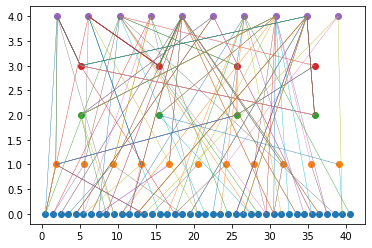

In [10]:
max_nodes_one_layer = np.max(length_of_each_layer)
for path in all_path_side2side:
    node1, node2 = path
    x1, y1 = dict_nodes_graph[node1]
    x2, y2 = dict_nodes_graph[node2]
    
    interval1 = max_nodes_one_layer/length_of_each_layer[y1]
    interval2 = max_nodes_one_layer/length_of_each_layer[y2]
    
    plt.plot([x1*interval1 + interval1/2, x2*interval2 + interval2/2], [y1, y2], linewidth=0.4)

for layer in range(max_length):
    interval = max_nodes_one_layer/length_of_each_layer[layer]
    plt.scatter((interval * np.arange(length_of_each_layer[layer]))+ interval/2, [layer]*length_of_each_layer[layer])

plt.show()

In [11]:
test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[1617:]
test_y = digits.target[1617:]

In [12]:
numbers = [*range(10)] # number 2 > number 1
number_of_classification = len(numbers)


list_y = test_y.tolist()
digits_indexes = []
for digit in numbers:
    li = [i for i in range(len(list_y)) if list_y[i] == digit]
    digits_indexes.extend(li)

samplesize = test_X[digits_indexes].shape[0]
test_x_inputs =[tuple(c) for c in test_X[digits_indexes].tolist()]
test_x_outputs = [tuple(c) for c in test_y[digits_indexes].reshape(samplesize,1).tolist()]

In [13]:
outputs = []
for xi in test_x_inputs:
    output = winner_net.activate(xi)
    outputs.append(output)


px_outputs = softmax(np.array(outputs).reshape(samplesize, number_of_classification), axis=1)
# the index of maximum in each line
test_pred_outputs = np.argmax(px_outputs, axis = 1)
# replace index to real number, from higher number to lower number!!
for i in range(number_of_classification):
    index = number_of_classification - i - 1
    test_pred_outputs[test_pred_outputs==index] = numbers[index]

test_real_outputs = np.array(test_x_outputs).reshape(samplesize,)

In [14]:
test_real_outputs

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9])

In [15]:
test_pred_outputs

array([0, 4, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 1, 3, 3, 1, 3, 3,
       1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 6, 3, 3, 3, 3, 6, 6,
       6, 6, 3, 3, 3, 3, 6, 6, 3, 3, 1, 3, 3, 6, 1, 3, 1, 3, 3, 6, 1, 1,
       3, 9, 6, 9, 1, 4, 4, 4, 4, 8, 4, 6, 4, 4, 4, 4, 6, 4, 4, 6, 4, 4,
       4, 4, 1, 5, 5, 4, 5, 6, 6, 6, 6, 1, 5, 6, 0, 6, 6, 6, 6, 6, 6, 6,
       6, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 4, 6, 6, 6, 6, 4, 8, 3, 4, 8, 3,
       1, 4, 1, 3, 1, 8, 3, 4, 4, 3, 1, 1, 8, 3, 4, 1, 4, 3, 1, 1, 8, 8,
       8, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 1], dtype=int64)

In [16]:
np.sum(test_pred_outputs == test_real_outputs)/samplesize

0.4666666666666667

In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_pred_outputs, test_real_outputs)
print(cm)

[[13  0  0  0  0  1  0  0  0  0]
 [ 0 14  0  5  1  2  2  5  9  5]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  4 10  8  0  0  0  5  3  1]
 [ 1  1  0  0 15  1  1  5  2  0]
 [ 0  0  0  0  0  4  0  0  0  0]
 [ 0  0  7  3  3 10 15  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  4  3  0]
 [ 2  0  0  2  0  0  0  0  0 12]]


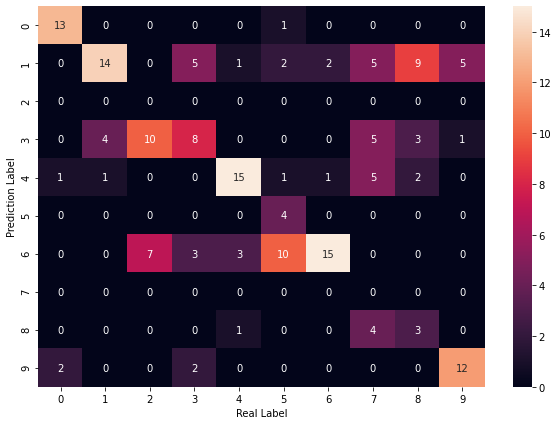

In [18]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [20]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

In [21]:
used_nodes = list(winner.nodes.keys())
# create a dict for mapping 
l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
l2 = range(len(l1))
dict_nodes = dict(zip(l1, l2))

### 将节点加入图
g = Graph(len(l1))# inputs + outputs + used  
# add connections in the graph
for cg in winner.connections.values():
    if cg.enabled:
        g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])
        
v = numbers
list_connections = []
for vi in v:
    for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
        list_connections.append(g.isReachable(u, vi))

nodes_inputs = range(number_of_classification, number_of_classification+ 64)
nodes_outputs = range(number_of_classification)
nodes_mid = range(number_of_classification + 64, len(dict_nodes))

# 找到所有输入和输出连接的路
all_path = []
for u in nodes_inputs:
    for v in nodes_outputs:
        path = findAllPath(g.graph, u, v)
        if path:
            all_path = all_path + path

# 得到最长路，以及每个节点在哪个层级
max_length = max([len(x) for x in all_path])
nodes_tuples_list = []
for path in all_path:
    #print(path)
    for node in path:
        nodes_tuples_list.append([node, path.index(node)])

# 确定节点的层级（消除重复）       
nodes_tuples_fixed_list = []
for index in range(max_length):
    for nodes in nodes_tuples_list:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            if nodes not in nodes_tuples_fixed_list:
                nodes_tuples_fixed_list.append(nodes)

    
# 所有有连接的节点
all_used_nodes = []
for node in nodes_tuples_fixed_list:
    if node[0] not in all_used_nodes:
        all_used_nodes.append(node[0])

# 确定节点的层级（最终确定）
nodes_tuples_fixed_list_final = []

for node in all_used_nodes:
    if node in nodes_inputs:
        nodes_tuples_fixed_list_final.append([node, 0])
    elif node in nodes_outputs:
        nodes_tuples_fixed_list_final.append([node, max_length - 1])
    else:
        list_node = []
        for nodes in nodes_tuples_fixed_list:
            if node == nodes[0]:
                list_node.append(nodes)
        layer = 0
        for ele in list_node:
            # 删除重复项，取最大
            if ele[1] > layer:
                layer = ele[1]
        nodes_tuples_fixed_list_final.append([node,layer])


# 每个层级的节点合数
length_of_layers = []
number_of_nodes = 0
for index in range(max_length):
    for nodes in nodes_tuples_fixed_list_final:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            number_of_nodes += 1
    length_of_layers.append(number_of_nodes)

length_of_each_layer = []
length_of_each_layer.append(length_of_layers[0])
for i in range(1, max_length):
    length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

# 输出每个层级的节点个数
print("length of each layers:", length_of_each_layer)

# 所有端到端的路
all_path_side2side = []
for path in all_path:
    if len(path) == 2:
        all_path_side2side.append(path)
    else:
        for i in range(len(path)-1):
            all_path_side2side.append([path[i],path[i+1]])

# 定义节点到绘图的字典
dict_nodes_graph = dict()
count_number_layer = [0] * max_length
for nodes in nodes_tuples_fixed_list_final:
    node, layer = nodes
    dict_nodes_graph[node] = [count_number_layer[layer], layer]
    count_number_layer[layer] += 1

length of each layers: [41, 11, 4, 4, 10]


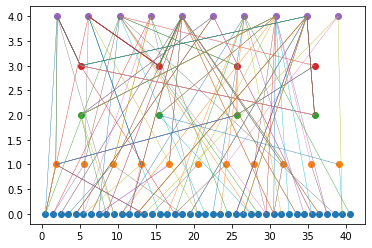

In [22]:
max_nodes_one_layer = np.max(length_of_each_layer)
for path in all_path_side2side:
    node1, node2 = path
    x1, y1 = dict_nodes_graph[node1]
    x2, y2 = dict_nodes_graph[node2]
    
    interval1 = max_nodes_one_layer/length_of_each_layer[y1]
    interval2 = max_nodes_one_layer/length_of_each_layer[y2]
    
    plt.plot([x1*interval1 + interval1/2, x2*interval2 + interval2/2], [y1, y2], linewidth=0.4)

for layer in range(max_length):
    interval = max_nodes_one_layer/length_of_each_layer[layer]
    plt.scatter((interval * np.arange(length_of_each_layer[layer]))+ interval/2, [layer]*length_of_each_layer[layer])

plt.show()

In [23]:
stats

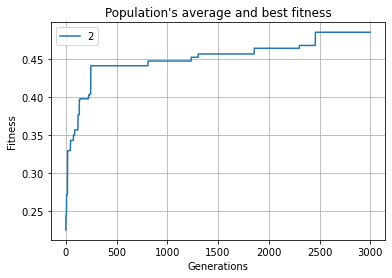

In [24]:

statistics = stats

generation = range(len(statistics.most_fit_genomes))
best_fitness = [c.fitness for c in statistics.most_fit_genomes]
avg_fitness = np.array(statistics.get_fitness_mean())
stdev_fitness = np.array(statistics.get_fitness_stdev())



#plt.plot(generation, avg_fitness, "b-", label="average")
#plt.plot(generation, avg_fitness - stdev_fitness, "g-.", label="-1 sd")
#plt.plot(generation, avg_fitness + stdev_fitness, "g-.", label="+1 sd")

plt.plot(generation, best_fitness, label=i)

plt.title("Population's average and best fitness")
plt.xlabel("Generations")
plt.ylabel("Fitness")
plt.grid()
plt.legend(loc="best")
plt.show()

In [25]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(10)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []


used_nodes = list(winner.nodes.keys())
# create a dict for mapping 
l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
l2 = range(len(l1))
dict_nodes = dict(zip(l1, l2))

### 将节点加入图
g = Graph(len(l1))# inputs + outputs + used  
# add connections in the graph
for cg in winner.connections.values():
    if cg.enabled:
        g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

v = numbers
list_connections = []
for vi in v:
    for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
        list_connections.append(g.isReachable(u, vi))

nodes_inputs = range(number_of_classification, number_of_classification+ 64)
nodes_outputs = range(number_of_classification)
nodes_mid = range(number_of_classification + 64, len(dict_nodes))

# 找到所有输入和输出连接的路
all_path = []
for u in nodes_inputs:
    for v in nodes_outputs:
        path = findAllPath(g.graph, u, v)
        if path:
            all_path = all_path + path

# 得到最长路，以及每个节点在哪个层级
max_length = max([len(x) for x in all_path])
nodes_tuples_list = []
for path in all_path:
    #print(path)
    for node in path:
        nodes_tuples_list.append([node, path.index(node)])

# 确定节点的层级（消除重复）       
nodes_tuples_fixed_list = []
for index in range(max_length):
    for nodes in nodes_tuples_list:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            if nodes not in nodes_tuples_fixed_list:
                nodes_tuples_fixed_list.append(nodes)


# 所有有连接的节点
all_used_nodes = []
for node in nodes_tuples_fixed_list:
    if node[0] not in all_used_nodes:
        all_used_nodes.append(node[0])

# 确定节点的层级（最终确定）
nodes_tuples_fixed_list_final = []

for node in all_used_nodes:
    if node in nodes_inputs:
        nodes_tuples_fixed_list_final.append([node, 0])
    elif node in nodes_outputs:
        nodes_tuples_fixed_list_final.append([node, max_length - 1])
    else:
        list_node = []
        for nodes in nodes_tuples_fixed_list:
            if node == nodes[0]:
                list_node.append(nodes)
        layer = 0
        for ele in list_node:
            # 删除重复项，取最大
            if ele[1] > layer:
                layer = ele[1]
        nodes_tuples_fixed_list_final.append([node,layer])


# 每个层级的节点合数
length_of_layers = []
number_of_nodes = 0
for index in range(max_length):
    for nodes in nodes_tuples_fixed_list_final:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            number_of_nodes += 1
    length_of_layers.append(number_of_nodes)

length_of_each_layer = []
length_of_each_layer.append(length_of_layers[0])
for i in range(1, max_length):
    length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

# 输出每个层级的节点个数
print("length of each layers:", length_of_each_layer)

# 所有端到端的路
all_path_side2side = []
for path in all_path:
    if len(path) == 2:
        all_path_side2side.append(path)
    else:
        for i in range(len(path)-1):
            all_path_side2side.append([path[i],path[i+1]])

# 定义节点到绘图的字典
dict_nodes_graph = dict()
count_number_layer = [0] * max_length
for nodes in nodes_tuples_fixed_list_final:
    node, layer = nodes
    dict_nodes_graph[node] = [count_number_layer[layer], layer]
    count_number_layer[layer] += 1
list_nodes_number.append(np.sum(length_of_each_layer))
list_connection_number.append(len(all_path_side2side))
total_nodes = np.sum(list_nodes_number)
total_connections = np.sum(list_connection_number)
print("Total nodes:{} Total connections::{}".format(total_nodes, total_connections))


length of each layers: [41, 11, 4, 4, 10]
Total nodes:70 Total connections::163
